In [231]:
import pandas as pd
import requests
import os

In [36]:
def get_keys_from_file(filename):
    import imp
    f = open(filename)
    global keys
    keys = imp.load_source('keys',filename)
    f.close()
    
get_keys_from_file('/Users/peterschnatz/Insight/Project1/RightPrice/eventbrite_keys.py')

eventbrite_api_token = keys.PRIVATE_TOKEN

eventbrite_api_base = keys.base

In [3]:
request = requests.get(eventbrite_api_base+'events/68291233919/?expand=venue,organizer,format,category,subcategory,bookmark_info,refund_policy,ticket_classes,ticket_availability,external_ticketing,music_properties,publish_settings,guestlist_metrics,listing_properties&token='+eventbrite_api_token)
request_json = request.json()

In [4]:
print('Name: %s\nOrganizer:    %s\nOrganization: %s' % (request_json['name']['text'],request_json['organizer_id'],request_json['organization_id']))

Name: Therapeutic Yoga
Organizer:    18291367526
Organization: 283974720005


In [5]:
request = requests.get(eventbrite_api_base+'events/search/?categories=107&subcategories=7005&expand=ticket_classes&location.address=newyork&expand=ticket_classes&token='+eventbrite_api_token)
request_json = request.json()
request_json

{'pagination': {'object_count': 171,
  'page_number': 1,
  'page_size': 50,
  'page_count': 4,
  'has_more_items': True},
 'events': [{'name': {'text': "Meditation as Medication: A Doctor's Perspective",
    'html': 'Meditation as Medication: A Doctor&#39;s Perspective'},
   'description': {'text': "Can meditation improve high blood pressure, anxiety, depression, or pain? \xa0\r\n\r\nIf a doctor told you to meditate, would you hesitate?\r\nScience of Spirituality Presents\r\nMeditation as Medication:\xa0A Doctor's Perspective\r\nMeet with top Medical Experts and Researchers and learn how meditation has changed them and their patients. \xa0Both speakers are co-authors of the book - Meditation as Medication, a best seller!\r\nRetreat is FREE of Charge\r\nSaturday, September 28, 2019\xa0\r\n10.30 AM – Registration & Welcome\r\n11 AM – 12.30 PM\r\nMeditation for Body, Mind and Soul: Meditation Experiences within Clinical Practices\r\nSpeaker: Dr. Matt Raider, M.D., Medical Director, CT\r\n

In [6]:
request_json['pagination']

{'object_count': 171,
 'page_number': 1,
 'page_size': 50,
 'page_count': 4,
 'has_more_items': True}

In [7]:
yoga_df = pd.DataFrame()

In [8]:
event_properties = [{'event_name':event['name']['text'],
                     'organizer':event['organizer_id'],
                     'organization':event['organization_id'],
                     'price':event['ticket_classes'][0]['cost']} 
                    for event in request_json['events']]

In [9]:
yoga_df = pd.DataFrame(event_properties)

In [10]:
yoga_df.price.fillna(value=0,inplace=True)

In [11]:
yoga_df.iloc[0]

event_name      Meditation as Medication: A Doctor's Perspective
organizer                                             2583029518
organization                                         38243310276
price                                                          0
Name: 0, dtype: object

In [12]:
yoga_df.price[0]

0

In [13]:
for row,value in enumerate(yoga_df.price):
    if value != 0:
        yoga_df.price[row] = float(value['major_value'])

In [14]:
yoga_df

event_name    organizer  \
0    Meditation as Medication: A Doctor's Perspective   2583029518   
1             Free Yoga Class: Yoga Basics and Breath  15386741481   
2                             Yoga in the Garden 2019   2339390903   
3                        Yoga in the Fort Greene Park  18937400320   
4                                         Gentle Yoga  12813753767   
5           Community Sputnik Yoga (FREE) @378 Throop   3548334683   
6   DRUNK YOGA® at Row NYC...FREE Wine! Saturdays ...  15821524808   
7   DUMBO SOCIAL INFLUENCER EVENT (+ barre class!)...  12054388158   
8                      BK Yoga Club: BK Morning Beats  18570445492   
9                                  Beginner Yogalates  18291367526   
10                                 Advanced Yogalates  18291367526   
11                                           ViniYoga  18291367526   
12  Tune In - Restorative Yoga & Himalayan Singing...  20312271518   
13                   Rooftop Yoga for People of Color  17989031888   
14  Meditate and Chill: Connecting singles with in...   8005609720   
15                      Fall Equinox Yoga & Gong Bath  12753750665   
16  FREE Outdoor Sunset Yoga by Setu + Chelsea Pie...  18094224115   
17  BDCFit Free Open House: Yoga, Pilates, Barre (...  19837364276   
18                       "La Femme Rose" Women Temple   6155004533   
19                                    Between Breaths  26377634925   
20  Yoga Mash-Up: Vinyasa Flow with African Drums ...  20221029262   
21                      Flow Into Fall with thecnnekt  11484455361   
22  Root to Rise: Community Flow - Yoga with BK Bu...  20021479121   
23                                 Joyful Rebel Yoga   26471986797   
24        Sip & Stretch: Unlimited Rosé and Self-Care  18319322853   
25  From the Bottom UP: A Chakra Balancing Kundali...   4790485295   
26                     Yoga Savvy: Sunny Rooftop Yoga  26366582093   
27       Self-Care Event for the Helping Professional  14138147076   
28       Tuesday Night Beginners Yoga with Hope Asana  15176314733   
29   Meditation and Yoga on Englewood Field Club Lawn  12813753767   
30  Drunk Yoga® at EVEN Hotel...FREE Wine! *Thursd...  15821524808   
31             Weekly Naam Class with Primavera Salvá  15403909824   
32                   Free Yoga Class during September  19837007798   
33  Secrets to Meditation in New York, NY - An Int...  20103667440   
34                    1st Thursday Network Yoga & Sip  26853464579   
35                           Intro to Kundalini Yoga   17608806814   
36                             The Healthy Happy Hour  26859365599   
37  Beyond Meditation - An Introduction to Sahaj S...  20103667440   
38  Yoga & Yoni Self Care - Make Your Own Yoni Ste...  19995498521   
39                           Sunset Yoga by Pyoga Lab  15498884022   
40  Beyond Meditation - An Introduction to Sahaj S...  20103667440   
41                       Tuesday Tabata & Tranquility   4790485295   
42                         Connecting Yoga & Ayurveda   4790485295   
43                  New Moon In Libra: Goddess Circle  23387702889   
44                  Misha Nonoo x Sky Ting Yoga Class  22650013962   
45  The BT Group x BK Yoga Club Presents: Afrobeat...  18570445492   
46                                               YOGA  26904052231   
47  poise + prana: exploring pilates through the s...  23459407331   
48           All White Goddess Gathering : Photoshoot  14405055447   
49                                    Fire Power Yoga  17695358464   

    organization  price  
0    38243310276      0  
1   218201622803      0  
2    33673116301      0  
3   293950156663      0  
4   201474657973     10  
5    53980502862      0  
6   236398958683     45  
7   166625625478      0  
8   289358742177     20  
9   283974720005    100  
10  283974720005    100  
11  283974720005    100  
12  228941257663     45  
13  277085064664     20  
14   19740631856     25  
15   59070822407  21.83  
16  280622578125      0  
17  

In [15]:
request = requests.get(eventbrite_api_base+'categories/?token='+eventbrite_api_token)
request.json()

{'locale': 'en_US',
 'pagination': {'object_count': 21,
  'page_number': 1,
  'page_size': 50,
  'page_count': 1,
  'has_more_items': False},
 'categories': [{'resource_uri': 'https://www.eventbriteapi.com/v3/categories/103/',
   'id': '103',
   'name': 'Music',
   'name_localized': 'Music',
   'short_name': 'Music',
   'short_name_localized': 'Music'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/101/',
   'id': '101',
   'name': 'Business & Professional',
   'name_localized': 'Business & Professional',
   'short_name': 'Business',
   'short_name_localized': 'Business'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/110/',
   'id': '110',
   'name': 'Food & Drink',
   'name_localized': 'Food & Drink',
   'short_name': 'Food & Drink',
   'short_name_localized': 'Food & Drink'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/113/',
   'id': '113',
   'name': 'Community & Culture',
   'name_localized': 'Community & Culture',
   'short

In [16]:
request = requests.get(eventbrite_api_base+'subcategories/?continuation=eyJwYWdlIjogMn0&token='+eventbrite_api_token)
request.json()

{'pagination': {'object_count': 197,
  'page_number': 2,
  'page_size': 50,
  'page_count': 4,
  'continuation': 'eyJwYWdlIjogM30',
  'has_more_items': True},
 'subcategories': [{'resource_uri': 'https://www.eventbriteapi.com/v3/subcategories/5004/',
   'id': '5004',
   'name': 'Dance',
   'name_localized': 'Dance',
   'parent_category': {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/105/',
    'id': '105',
    'name': 'Performing & Visual Arts',
    'name_localized': 'Performing & Visual Arts',
    'short_name': 'Arts',
    'short_name_localized': 'Arts'}},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/subcategories/5005/',
   'id': '5005',
   'name': 'Opera',
   'name_localized': 'Opera',
   'parent_category': {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/105/',
    'id': '105',
    'name': 'Performing & Visual Arts',
    'name_localized': 'Performing & Visual Arts',
    'short_name': 'Arts',
    'short_name_localized': 'Arts'}},
  {'resource_uri

In [17]:
request = requests.get(eventbrite_api_base+'events/search/?page=2&location.address=usa&categories=108&expand=venue,organizer,format,category,subcategory,bookmark_info,refund_policy,ticket_classes,ticket_availability,external_ticketing,music_properties,publish_settings,guestlist_metrics,listing_properties&token='+eventbrite_api_token)
request_json = request.json()
num_pages = request_json['pagination']['page_count']

In [18]:
request_json

{'pagination': {'object_count': 2430,
  'page_number': 2,
  'page_size': 50,
  'page_count': 49,
  'has_more_items': True},
 'events': [{'name': {'text': '*FREE* International BigTime Wrestling',
    'html': '*FREE* International BigTime Wrestling'},
   'description': {'text': 'International BigTime Wrestling',
    'html': 'International BigTime Wrestling'},
   'id': '70683242481',
   'url': 'https://www.eventbrite.com/e/free-international-bigtime-wrestling-tickets-70683242481?aff=ebapi',
   'start': {'timezone': 'America/Detroit',
    'local': '2019-09-29T15:00:00',
    'utc': '2019-09-29T19:00:00Z'},
   'end': {'timezone': 'America/Detroit',
    'local': '2019-09-29T18:00:00',
    'utc': '2019-09-29T22:00:00Z'},
   'organization_id': '262767704819',
   'created': '2019-08-27T19:39:25Z',
   'changed': '2019-08-27T19:44:31Z',
   'published': '2019-08-27T19:41:46Z',
   'capacity': None,
   'capacity_is_custom': None,
   'status': 'live',
   'currency': 'USD',
   'listed': True,
   'shar

In [19]:
def add_data_to_df(request_json,current_df):
    event_properties = [{'event_name':event['name']['text'],
                         'event_id':event['id'],
                         'organizer':event['organizer_id'],
                         'organization':event['organization_id'],
                         'local_start_dt':event['start']['local'],
                         'local_end_dt':event['end']['local'],
                         'created_dt':event['created'],
                         'published_dt':event['published'],
                         'price':event['ticket_classes'][0]['cost']}
                        for event in request_json['events']]
    temp_df = pd.DataFrame(event_properties)
    return pd.concat([current_df,temp_df],axis=0).reset_index(drop=True)

In [20]:
sports_df = pd.DataFrame()

request = requests.get(eventbrite_api_base+'events/search/?categories=108&expand=ticket_classes&token='+eventbrite_api_token)
request_json = request.json()
num_pages = request_json['pagination']['page_count']

print(num_pages)

sports_df = add_data_to_df(request_json,sports_df)

for page in range(1,2):
    request = requests.get(eventbrite_api_base+'events/search/?categories=108&expand=ticket_classes&page='+str(page+1)+'&token='+eventbrite_api_token)
    request_json = request.json()
    sports_df = add_data_to_df(request_json,sports_df)



166


In [21]:
sports_df.price.fillna(value=0,inplace=True)

for row,value in enumerate(sports_df.price):
    if value != 0:
        sports_df.price[row] = float(value['major_value'])

In [22]:
bin_edges = [edge for edge in range(0,100,5)]

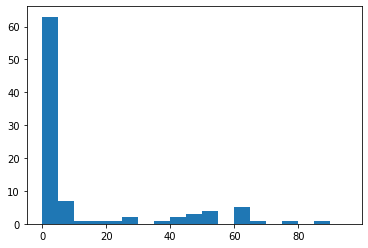

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(sports_df.price,bins=bin_edges)
plt.show()

In [24]:
max(sports_df.price)

495.0

In [25]:
sports_df.loc[sports_df.price == 0,['event_id','local_start_dt','local_end_dt','created_dt','published_dt']]

event_id       local_start_dt         local_end_dt  \
0   66702120839  2019-09-20T12:00:00  2019-09-21T21:00:00   
1   61927175850  2019-10-17T19:00:00  2020-04-25T22:00:00   
2   64868845463  2019-09-22T12:00:00  2019-09-22T19:00:00   
4   63424273710  2019-10-17T19:00:00  2019-10-17T23:00:00   
5   65715012371  2019-11-10T10:00:00  2019-11-17T19:00:00   
..          ...                  ...                  ...   
93  51444645319  2019-10-26T07:30:00  2019-10-26T16:30:00   
94  55778855057  2019-10-12T09:00:00  2019-10-12T17:00:00   
95  67038091737  2019-09-29T10:00:00  2019-09-29T16:00:00   
97  70462097029  2019-09-19T16:00:00  2019-09-19T19:00:00   
99  66905816097  2019-11-02T09:00:00  2019-11-02T13:00:00   

              created_dt          published_dt  
0   2019-07-26T18:30:23Z  2019-07-30T17:12:21Z  
1   2019-05-15T12:21:32Z  2019-05-15T12:38:18Z  
2   2019-07-06T12:27:12Z  2019-07-06T13:00:36Z  
4   2019-06-13T10:47:57Z  2019-06-13T11:01:14Z  
5   2019-07-17T18:05:53Z  2019-07-25T15:04:16Z  
..                   ...                   ...  
93  2018-10-16T01:42:41Z  2018-10-16T01:42:45Z  
94  2019-02-01T18:27:09Z  2019-02-01T23:24:47Z  
95  2019-07-30T15:56:57Z  2019-07-30T16:01:30Z  
97  2019-08-26T04:45:31Z  2019-08-26T04:54:47Z  
99  2019-07-29T16:13:48Z  2019-07-29T16:16:16Z  

[63 rows x 5 columns]

In [26]:
sports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
event_name        100 non-null object
event_id          100 non-null object
organizer         100 non-null object
organization      100 non-null object
local_start_dt    100 non-null object
local_end_dt      100 non-null object
created_dt        100 non-null object
published_dt      100 non-null object
price             100 non-null object
dtypes: object(9)
memory usage: 7.2+ KB


In [27]:
request_json

{'pagination': {'object_count': 8250,
  'page_number': 2,
  'page_size': 50,
  'page_count': 165,
  'has_more_items': True},
 'events': [{'name': {'text': 'Colour Run', 'html': 'Colour Run'},
   'description': {'text': 'Monday 23 September 2019, 4-6pm - FREE to all students and staff of the university. FREE t-shirt for all entrants',
    'html': 'Monday 23 September 2019, 4-6pm - FREE to all students and staff of the university. FREE t-shirt for all entrants'},
   'id': '66684415883',
   'url': 'https://www.eventbrite.co.uk/e/colour-run-tickets-66684415883?aff=ebapi',
   'start': {'timezone': 'Europe/London',
    'local': '2019-09-23T16:00:00',
    'utc': '2019-09-23T15:00:00Z'},
   'end': {'timezone': 'Europe/London',
    'local': '2019-09-23T18:00:00',
    'utc': '2019-09-23T17:00:00Z'},
   'organization_id': '90402217607',
   'created': '2019-07-26T15:09:46Z',
   'changed': '2019-08-31T17:37:03Z',
   'published': '2019-07-26T15:37:28Z',
   'capacity': None,
   'capacity_is_custom': 

In [28]:
sports_df['local_start_dt'] = pd.to_datetime(sports_df['local_start_dt'],infer_datetime_format=True)
sports_df['local_end_dt'] = pd.to_datetime(sports_df['local_end_dt'],infer_datetime_format=True)
sports_df['created_dt'] = pd.to_datetime(sports_df['created_dt'],infer_datetime_format=True)
sports_df['published_dt'] = pd.to_datetime(sports_df['published_dt'],infer_datetime_format=True)

In [29]:
sports_df.sort_values(by=['created_dt'])

event_name     event_id  \
6     Southwest Warriors-Registration-Tickets-Apparel  10628761913   
37  Sign Up to Stay Informed About Bell Joy Ride —...  22240494919   
75                                 50+ Disc Golf Club  26984535472   
68                                 GFNY URUGUAY CLUB   37368444022   
29                 Event Waiver @ Somers Sports Arena  37415609094   
..                                                ...          ...   
86      Fitbit Local Power Yoga & Bodyweight Bootcamp  71434513553   
59             BGSU Hockey Season Ticket Holder Party  71545168525   
69        Bend on Bridge Park Ave with Barre3 & Rebol  71692292577   
9                     WAMI - Yoga Sotto Le Stelle 3.0  72051374601   
65  REEBOK Presents: Midnight Runners 7k Bootcamp,...  72245156207   

      organizer  organization      local_start_dt        local_end_dt  \
6    1880150567   17032646729 2018-05-11 17:00:00 2020-09-23 23:00:00   
37   9857557238  167352192090 2017-01-31 19:00:00 2019-12-29 22:00:00   
75  10674141594  173307282955 2035-12-30 13:00:00 2035-12-31 13:00:00   
68   8767323653  159761206564 2018-12-29 08:00:00 2026-03-27 08:00:00   
29  14901636350  223638375523 2017-08-29 10:00:00 2019-12-31 14:00:00   
..          ...           ...                 ...                 ...   
86   8468688740  126951379279 2019-09-26 18:30:00 2019-09-26 19:30:00   
59  25338978873  315975409699 2019-09-28 11:00:00 2019-09-28 13:30:00   
69   7897242422  104273390857 2019-09-28 08:30:00 2019-09-28 09:30:00   
9   14968175889  221555852194 2019-09-28 19:00:00 2019-09-28 21:00:00   
65  10968470575  158637727881 2019-09-25 19:00:00 2019-09-25 20:30:00   

            created_dt        published_dt  price  
6  2014-02-14 15:57:19 2014-02-14 16:06:35  49.99  
37 2016-02-25 22:20:28 2016-02-25 22:20:30      0  
75 2016-08-06 17:59:11 2016-08-06 18:01:51      0  
68 2017-08-27 16:29:41 2017-08-27 16:40:58      0  
29 2017-08-29 12:15:47 2017-08-29 12:30:29      0  
..                 ...                 ...    ...  
86 2019-09-03 21:50:04 2019-09-03 21:55:48      0  
59 2019-09-04 18:05:01 2019-09-04 18:10:39      0  
69 2019-09-05 18:15:54 2019-09-05 18:25:58      0  
9  2019-09-09 08:42:57 2019-09-09 08:50:06      0  
65 2019-09-10 13:42:32 2019-09-10 14:21:25      0  

[100 rows x 9 columns]

check

### Google Custom Search API ##

In [35]:
get_keys_from_file('/Users/peterschnatz/Insight/Project1/RightPrice/google_keys.py')

google_api_token = keys.API_key
google_cx = keys.cx
google_api_base = keys.base

Check with "September 15 2018"

In [85]:
event_ids = []
startIndex = 1

while startIndex <= 100:
    request = requests.get(google_api_base+'key='+google_api_token+'&cx='+google_cx+'&start='+str(startIndex)+'&q=September 15 2018')
    request_json = request.json()

    for page in request_json['items']:
        event_ids.append(int(page['link'][-11:]))
        
    startIndex = request_json['queries']['nextPage'][0]['startIndex']

### Scrape Google for past event ids 

In [218]:
import time

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

event_id_base = '/e/'
        
start_date = date(2018, 9, 19)
end_date = date(2018, 11, 1)

# event_ids = []
error = 0

for single_date in daterange(start_date, end_date):
    startIndex = 1

    while startIndex <= 100:
        time.sleep(1)
        request = requests.get(google_api_base+'key='+google_api_token+'&cx='+google_cx+'&start='+str(startIndex)+'&q='+str(single_date.strftime("%B"))+' '+str(single_date.day)+' '+str(single_date.year))
 
        if request.status_code != 200:
            end_point = {'single_date' : single_date, 
                         'startIndex' : startIndex, 
                         'page' : page}
            error = 1
            print('Request error code %d' % request.status_code)
            print('Reason: %s' % request.json()['error']['errors'][0]['reason'])
            print('Message: %s' % request.json()['error']['message'])
            break
            
        request_json = request.json()

        for page in request_json['items']:
            try:
                event_ogtype = page['pagemap']['metatags'][0]['og:type']
                event_id_end = page['pagemap']['metatags'][0]['og:url'].find('?aff')
                
            except KeyError:
                print('KeyError: No metatags')
                
            else:
                if event_ogtype == 'events.event':
                    event_id_start = page['pagemap']['metatags'][0]['og:url'].find(event_id_base) + len(event_id_base)
                    event_ids.append(int(page['pagemap']['metatags'][0]['og:url'][event_id_start:event_id_end]))
                    

        startIndex = request_json['queries']['nextPage'][0]['startIndex']
    
    if error == 1: break
    
    print(single_date)

2018-09-19
2018-09-20
2018-09-21
2018-09-22
2018-09-23
2018-09-24
2018-09-25
No metatags
2018-09-26
2018-09-27
2018-09-28
2018-09-29
2018-09-30
2018-10-01
2018-10-02
2018-10-03
2018-10-04
2018-10-05
2018-10-06
2018-10-07
2018-10-08
2018-10-09
2018-10-10
2018-10-11
2018-10-12
2018-10-13
2018-10-14
No metatags
2018-10-15
No metatags
2018-10-16
2018-10-17
2018-10-18
2018-10-19
2018-10-20
2018-10-21
No metatags
2018-10-22
2018-10-23
2018-10-24
2018-10-25
2018-10-26
2018-10-27
2018-10-28
2018-10-29
2018-10-30
No metatags
2018-10-31


Write event_ids to a list to preserve and protect them

### Remove duplicate event ids. Write event_ids to txt file to preserve them. Append new ids if file already has some

In [254]:
event_ids_no_duplicates = list(dict.fromkeys(event_ids))

if os.stat('past_event_ids.txt').st_size == 0:
    mode = 'w'
else:
    mode = 'a'
    
with open('past_event_ids.txt', 'w') as filehandle:
    line_count = 0
    for listitem in event_ids_no_duplicates:
        filehandle.write('%s\n' % listitem)
        line_count += 1
    print('File name: %s\nNew lines %d' % (filehandle.name, line_count))

File name: past_event_ids.txt
New lines 5912


In [102]:
def Repeat(x): 
    _size = len(x) 
    repeated = [] 
    for i in range(_size): 
        k = i + 1
        for j in range(k, _size): 
            if x[i] == x[j] and x[i] not in repeated: 
                repeated.append(x[i]) 
    return repeated 

## Use Eventbrite API to grab event data

Set API token and base.

In [255]:
def get_keys_from_file(filename):
    import imp
    f = open(filename)
    global keys
    keys = imp.load_source('keys',filename)
    f.close()
    
get_keys_from_file('/Users/peterschnatz/Insight/Project1/RightPrice/eventbrite_keys.py')

eventbrite_api_token = keys.PRIVATE_TOKEN

eventbrite_api_base = keys.base

Grab past event ids and place in list.

In [259]:
# define empty list
past_event_ids = []

# open file and read the content in a list
with open('past_event_ids.txt', 'r') as filehandle:
    filecontents = filehandle.readlines()

    for line in filecontents:
        # remove linebreak which is the last character of the string
        current_id = line[:-1]

        # add item to the list
        past_event_ids.append(current_id)
    
    print('%d event ids read to list.' % (len(past_event_ids)))

5912 event ids read to list.


In [293]:
features_list = []

with open('features_list.txt','r') as filehandle:
    for line in filehandle:
        features_list.append([line.replace('\n','').replace(' ','')])

features_list

[["'id'"],
 ["'start'"],
 ["'timezone'"],
 ["'local'"],
 ["'end'"],
 ["'local'"],
 ["'created'"],
 ["'published'"],
 ["'currency'"],
 ["'listed'"],
 ["'shareable'"],
 ["'online_event'"],
 ["'locale'"],
 ["'is_series'"],
 ["'is_series_parent'"],
 ["'inventory_type'"],
 ["'is_reserved_seating'"],
 ["'venue_id'"],
 ["'category_id'"],
 ["'subcategory_id'"],
 ["'format_id'"],
 ["'venue'"],
 ["'address'"],
 ["'city'"],
 ["'region'"],
 ["'postal_code'"],
 ["'country'"],
 ["'id'"],
 ["'refund_policy'"],
 ["'refund_policy'"],
 ["'refund_retention_policy'"],
 ["'ticket_classes'"],
 ["'cost'"],
 ["'major_value'"],
 ["'fee'"],
 ["'major_value'"],
 ["'tax'"],
 ["'major_value'"],
 ["'donation'"],
 ["'free'"],
 ["'maximum_quantity'"],
 ["'on_sale_status'"],
 ["'sales_start'"],
 ["'sales_end'"],
 ["'include_fee'"],
 ["'listing_properties'"],
 ["'is_paid'"],
 ["'ticket_availability'"],
 ["'has_available_tickets'"],
 ["'is_sold_out'"],
 ["'start_sales_date'"],
 ["'timezone'"],
 ["'local'"],
 ["'waitlist

In [297]:
features_dict = {'id' : event['id'],
 'start_tz' : event['start']['timezone'],
 'start_local_dt' : event['start']['local'],
 'end_local_dt' : event['end']['local'],
 'created_dt' : event['created'],
 'published_dt' : event['published'],
 'currency' : event['currency'],
 'listed' : event['listed'],
 'shareable' : event['shareable'],
 'online_event' : event['online_event'],
 'locale' : event['locale'],
 'is_series' : event['is_series'],
 'is_series_parent' : event['is_series_parent'],
 'inventory_type' : event['inventory_type'],
 'is_reserved_seating' : event['is_reserved_seating'],
 'venue_id' : event['venue_id'],
 'category_id' : event['category_id'],
 'subcategory_id' : event['subcategory_id'],
 'format_id' : event['format_id'],
 'address' : event['venue']['address'],
 'city' : event['venue']['city'],
 'region' : event['venue']['region'],
 'postal_code' : event['venue']['postal_code'],
 'country' : event['venue']['country'],
 'refund_policy' : event['refund_policy']['refund_policy'],
 'refund_retention_policy' : event['refund_policy']['refund_retention_policy'],
 'is_paid' : event['listing_properties']['is_paid'],
 'has_available_tickets' : event['ticket_availability']['has_available_tickets'],
 'is_sold_out' : event['ticket_availability']['is_sold_out'],
 'availability_tz' : event['ticket_availability']['start_sales_date']['timezone'],
 'availability_dt' : event['ticket_availability']['start_sales_date']['local'],
 'waitlist_available' : event['waitlist_available']}

ticket_classes_dict = {
    'cost' : event['ticket_classes']['cost']['major_value'],
    'fee' : event['ticket_classes']['fee']['major_value'],
    'tax' : event['ticket_classes']['tax']['major_value'],
    'donation' : event['ticket_classes']['donation'],
    'free' : event['ticket_classes']['free'],
    'maximum_quantity' : event['ticket_classes']['maximum_quantity'],
    'on_sale_status' : event['ticket_classes']['on_sale_status'],
    'sales_start' : event['ticket_classes']['sales_start'],
    'sales_end' : event['ticket_classes']['sales_end'],
    'include_fee' : event['ticket_classes']['include_fee']
    }

TypeError: string indices must be integers

In [349]:
len(past_event_ids)

5912

In [501]:
error = 0
count = 0
event_df = pd.DataFrame()

for event_id in past_event_ids[:100]:
    time.sleep(1.75)
    request = requests.get(eventbrite_api_base+'events/'+event_id+'/?expand=venue,refund_policy,ticket_classes,listing_properties,ticket_availability&token='+eventbrite_api_token)
    event_json = request.json()

    count += 1
    if count%100 == 0:
        print(count)

    if request.status_code != 200:
        end_point = {'event_id' : event} 
        error = 1
        print('Request error code %d' % request.status_code)
        print('Error description: %s' % event_json['error_description'])
        print('Error: %s' % event_json['error'])
        print('\nEvent id raising error: %s' % event_id)
        break

    try:
        event_properties = [{'id' : event_json['id'],
                             'start_tz' : event_json['start']['timezone'],
                             'start_local_dt' : event_json['start']['local'],
                             'end_local_dt' : event_json['end']['local'],
                             'created_dt' : event_json['created'],
                             'published_dt' : event_json['published'],
                             'currency' : event_json['currency'],
                             'listed' : event_json['listed'],
                             'shareable' : event_json['shareable'],
                             'online_event' : event_json['online_event'],
                             'locale' : event_json['locale'],
                             'is_series' : event_json['is_series'],
                             'is_series_parent' : event_json['is_series_parent'],
                             'inventory_type' : event_json['inventory_type'],
                             'is_reserved_seating' : event_json['is_reserved_seating'],
                             'venue_id' : event_json['venue_id'],
                             'category_id' : event_json['category_id'],
                             'subcategory_id' : event_json['subcategory_id'],
                             'format_id' : event_json['format_id'],
                             'city' : event_json['venue']['address']['city'],
                             'region' : event_json['venue']['address']['region'],
                             'postal_code' : event_json['venue']['address']['postal_code'],
                             'country' : event_json['venue']['address']['country'],
                             'refund_policy' : event_json['refund_policy']['refund_policy'],
                             'refund_retention_policy' : event_json['refund_policy']['refund_retention_policy'],
                             'is_paid' : event_json['listing_properties']['is_paid'],
                             'has_available_tickets' : event_json['ticket_availability']['has_available_tickets'],
                             'is_sold_out' : event_json['ticket_availability']['is_sold_out'],
                             'waitlist_available' : event_json['ticket_availability']['waitlist_available']}]

    except TypeError:
        
        try:
            
            event_properties = [{'id' : event_json['id'],
                             'start_tz' : event_json['start']['timezone'],
                             'start_local_dt' : event_json['start']['local'],
                             'end_local_dt' : event_json['end']['local'],
                             'created_dt' : event_json['created'],
                             'published_dt' : event_json['published'],
                             'currency' : event_json['currency'],
                             'listed' : event_json['listed'],
                             'shareable' : event_json['shareable'],
                             'online_event' : event_json['online_event'],
                             'locale' : event_json['locale'],
                             'is_series' : event_json['is_series'],
                             'is_series_parent' : event_json['is_series_parent'],
                             'inventory_type' : event_json['inventory_type'],
                             'is_reserved_seating' : event_json['is_reserved_seating'],
                             'venue_id' : event_json['venue_id'],
                             'category_id' : event_json['category_id'],
                             'subcategory_id' : event_json['subcategory_id'],
                             'format_id' : event_json['format_id'],
                             'refund_policy' : event_json['refund_policy']['refund_policy'],
                             'refund_retention_policy' : event_json['refund_policy']['refund_retention_policy'],
                             'is_paid' : event_json['listing_properties']['is_paid'],
                             'has_available_tickets' : event_json['ticket_availability']['has_available_tickets'],
                             'is_sold_out' : event_json['ticket_availability']['is_sold_out'],
                             'waitlist_available' : event_json['ticket_availability']['waitlist_available']}]

        except TypeError:
            print('Fatal TypeError1 for event properties. Event_id: %s' % event_id)
            continue

    
    try:
        all_ticket_properties = []
        
        for tier_num, tier in enumerate(event_json['ticket_classes']):
            try:
                ticket_properties = [{'cost_' + str(tier_num) : tier['cost']['major_value'],
                                          'fee_' + str(tier_num) : tier['fee']['major_value'],
                                          'tax_' + str(tier_num) : tier['tax']['major_value'],
                                          'donation_' + str(tier_num) : tier['donation'],
                                          'free_' + str(tier_num) : tier['free'],
                                          'maximum_quantity_' + str(tier_num) : tier['maximum_quantity'],
                                          'on_sale_status_' + str(tier_num) : tier['on_sale_status'],
                                          'include_fee_' + str(tier_num) : tier['include_fee']}]
            except TypeError:

                try:
                    ticket_properties = [{'cost_' + str(tier_num) : 0,
                                              'fee_' + str(tier_num) : 0,
                                              'tax_' + str(tier_num) : 0,
                                              'donation_' + str(tier_num) : tier['donation'],
                                              'free_' + str(tier_num) : tier['free'],
                                              'maximum_quantity_' + str(tier_num) : tier['maximum_quantity'],
                                              'on_sale_status_' + str(tier_num) : tier['on_sale_status'],
                                              'include_fee_' + str(tier_num) : tier['include_fee']}]
                except TypeError:
                    print('Fatal TypeError2 for ticket properties. Event_id: %s' % event_id)
                    continue
                
            all_ticket_properties = all_ticket_properties + ticket_properties

        all_properties = event_properties + all_ticket_properties

        event_dict = {key: value for d in all_properties for key, value in d.items()}
        
        event_df = event_df.append(event_dict,ignore_index=True)

    except TypeError:
        print('Fatal TypeError3 for all properties. Event_id: %s' % event_id)
        continue

100


In [36]:
def get_keys_from_file(filename):
    import imp
    f = open(filename)
    global keys
    keys = imp.load_source('keys',filename)
    f.close()
    
get_keys_from_file('/Users/peterschnatz/Insight/Project1/RightPrice/eventbrite_keys.py')

eventbrite_api_token = keys.PRIVATE_TOKEN

eventbrite_api_base = keys.base

In [3]:
request = requests.get(eventbrite_api_base+'events/68291233919/?expand=venue,organizer,format,category,subcategory,bookmark_info,refund_policy,ticket_classes,ticket_availability,external_ticketing,music_properties,publish_settings,guestlist_metrics,listing_properties&token='+eventbrite_api_token)
request_json = request.json()

In [4]:
print('Name: %s\nOrganizer:    %s\nOrganization: %s' % (request_json['name']['text'],request_json['organizer_id'],request_json['organization_id']))

Name: Therapeutic Yoga
Organizer:    18291367526
Organization: 283974720005


In [5]:
request = requests.get(eventbrite_api_base+'events/search/?categories=107&subcategories=7005&expand=ticket_classes&location.address=newyork&expand=ticket_classes&token='+eventbrite_api_token)
request_json = request.json()
request_json

{'pagination': {'object_count': 171,
  'page_number': 1,
  'page_size': 50,
  'page_count': 4,
  'has_more_items': True},
 'events': [{'name': {'text': "Meditation as Medication: A Doctor's Perspective",
    'html': 'Meditation as Medication: A Doctor&#39;s Perspective'},
   'description': {'text': "Can meditation improve high blood pressure, anxiety, depression, or pain? \xa0\r\n\r\nIf a doctor told you to meditate, would you hesitate?\r\nScience of Spirituality Presents\r\nMeditation as Medication:\xa0A Doctor's Perspective\r\nMeet with top Medical Experts and Researchers and learn how meditation has changed them and their patients. \xa0Both speakers are co-authors of the book - Meditation as Medication, a best seller!\r\nRetreat is FREE of Charge\r\nSaturday, September 28, 2019\xa0\r\n10.30 AM – Registration & Welcome\r\n11 AM – 12.30 PM\r\nMeditation for Body, Mind and Soul: Meditation Experiences within Clinical Practices\r\nSpeaker: Dr. Matt Raider, M.D., Medical Director, CT\r\n

In [6]:
request_json['pagination']

{'object_count': 171,
 'page_number': 1,
 'page_size': 50,
 'page_count': 4,
 'has_more_items': True}

In [7]:
yoga_df = pd.DataFrame()

In [8]:
event_properties = [{'event_name':event['name']['text'],
                     'organizer':event['organizer_id'],
                     'organization':event['organization_id'],
                     'price':event['ticket_classes'][0]['cost']} 
                    for event in request_json['events']]

In [9]:
yoga_df = pd.DataFrame(event_properties)

In [10]:
yoga_df.price.fillna(value=0,inplace=True)

In [11]:
yoga_df.iloc[0]

event_name      Meditation as Medication: A Doctor's Perspective
organizer                                             2583029518
organization                                         38243310276
price                                                          0
Name: 0, dtype: object

In [12]:
yoga_df.price[0]

0

In [13]:
for row,value in enumerate(yoga_df.price):
    if value != 0:
        yoga_df.price[row] = float(value['major_value'])

In [14]:
yoga_df

event_name    organizer  \
0    Meditation as Medication: A Doctor's Perspective   2583029518   
1             Free Yoga Class: Yoga Basics and Breath  15386741481   
2                             Yoga in the Garden 2019   2339390903   
3                        Yoga in the Fort Greene Park  18937400320   
4                                         Gentle Yoga  12813753767   
5           Community Sputnik Yoga (FREE) @378 Throop   3548334683   
6   DRUNK YOGA® at Row NYC...FREE Wine! Saturdays ...  15821524808   
7   DUMBO SOCIAL INFLUENCER EVENT (+ barre class!)...  12054388158   
8                      BK Yoga Club: BK Morning Beats  18570445492   
9                                  Beginner Yogalates  18291367526   
10                                 Advanced Yogalates  18291367526   
11                                           ViniYoga  18291367526   
12  Tune In - Restorative Yoga & Himalayan Singing...  20312271518   
13                   Rooftop Yoga for People of Color  17989031888   
14  Meditate and Chill: Connecting singles with in...   8005609720   
15                      Fall Equinox Yoga & Gong Bath  12753750665   
16  FREE Outdoor Sunset Yoga by Setu + Chelsea Pie...  18094224115   
17  BDCFit Free Open House: Yoga, Pilates, Barre (...  19837364276   
18                       "La Femme Rose" Women Temple   6155004533   
19                                    Between Breaths  26377634925   
20  Yoga Mash-Up: Vinyasa Flow with African Drums ...  20221029262   
21                      Flow Into Fall with thecnnekt  11484455361   
22  Root to Rise: Community Flow - Yoga with BK Bu...  20021479121   
23                                 Joyful Rebel Yoga   26471986797   
24        Sip & Stretch: Unlimited Rosé and Self-Care  18319322853   
25  From the Bottom UP: A Chakra Balancing Kundali...   4790485295   
26                     Yoga Savvy: Sunny Rooftop Yoga  26366582093   
27       Self-Care Event for the Helping Professional  14138147076   
28       Tuesday Night Beginners Yoga with Hope Asana  15176314733   
29   Meditation and Yoga on Englewood Field Club Lawn  12813753767   
30  Drunk Yoga® at EVEN Hotel...FREE Wine! *Thursd...  15821524808   
31             Weekly Naam Class with Primavera Salvá  15403909824   
32                   Free Yoga Class during September  19837007798   
33  Secrets to Meditation in New York, NY - An Int...  20103667440   
34                    1st Thursday Network Yoga & Sip  26853464579   
35                           Intro to Kundalini Yoga   17608806814   
36                             The Healthy Happy Hour  26859365599   
37  Beyond Meditation - An Introduction to Sahaj S...  20103667440   
38  Yoga & Yoni Self Care - Make Your Own Yoni Ste...  19995498521   
39                           Sunset Yoga by Pyoga Lab  15498884022   
40  Beyond Meditation - An Introduction to Sahaj S...  20103667440   
41                       Tuesday Tabata & Tranquility   4790485295   
42                         Connecting Yoga & Ayurveda   4790485295   
43                  New Moon In Libra: Goddess Circle  23387702889   
44                  Misha Nonoo x Sky Ting Yoga Class  22650013962   
45  The BT Group x BK Yoga Club Presents: Afrobeat...  18570445492   
46                                               YOGA  26904052231   
47  poise + prana: exploring pilates through the s...  23459407331   
48           All White Goddess Gathering : Photoshoot  14405055447   
49                                    Fire Power Yoga  17695358464   

    organization  price  
0    38243310276      0  
1   218201622803      0  
2    33673116301      0  
3   293950156663      0  
4   201474657973     10  
5    53980502862      0  
6   236398958683     45  
7   166625625478      0  
8   289358742177     20  
9   283974720005    100  
10  283974720005    100  
11  283974720005    100  
12  228941257663     45  
13  277085064664     20  
14   19740631856     25  
15   59070822407  21.83  
16  280622578125      0  
17  

In [15]:
request = requests.get(eventbrite_api_base+'categories/?token='+eventbrite_api_token)
request.json()

{'locale': 'en_US',
 'pagination': {'object_count': 21,
  'page_number': 1,
  'page_size': 50,
  'page_count': 1,
  'has_more_items': False},
 'categories': [{'resource_uri': 'https://www.eventbriteapi.com/v3/categories/103/',
   'id': '103',
   'name': 'Music',
   'name_localized': 'Music',
   'short_name': 'Music',
   'short_name_localized': 'Music'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/101/',
   'id': '101',
   'name': 'Business & Professional',
   'name_localized': 'Business & Professional',
   'short_name': 'Business',
   'short_name_localized': 'Business'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/110/',
   'id': '110',
   'name': 'Food & Drink',
   'name_localized': 'Food & Drink',
   'short_name': 'Food & Drink',
   'short_name_localized': 'Food & Drink'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/113/',
   'id': '113',
   'name': 'Community & Culture',
   'name_localized': 'Community & Culture',
   'short

In [16]:
request = requests.get(eventbrite_api_base+'subcategories/?continuation=eyJwYWdlIjogMn0&token='+eventbrite_api_token)
request.json()

{'pagination': {'object_count': 197,
  'page_number': 2,
  'page_size': 50,
  'page_count': 4,
  'continuation': 'eyJwYWdlIjogM30',
  'has_more_items': True},
 'subcategories': [{'resource_uri': 'https://www.eventbriteapi.com/v3/subcategories/5004/',
   'id': '5004',
   'name': 'Dance',
   'name_localized': 'Dance',
   'parent_category': {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/105/',
    'id': '105',
    'name': 'Performing & Visual Arts',
    'name_localized': 'Performing & Visual Arts',
    'short_name': 'Arts',
    'short_name_localized': 'Arts'}},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/subcategories/5005/',
   'id': '5005',
   'name': 'Opera',
   'name_localized': 'Opera',
   'parent_category': {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/105/',
    'id': '105',
    'name': 'Performing & Visual Arts',
    'name_localized': 'Performing & Visual Arts',
    'short_name': 'Arts',
    'short_name_localized': 'Arts'}},
  {'resource_uri

In [17]:
request = requests.get(eventbrite_api_base+'events/search/?page=2&location.address=usa&categories=108&expand=venue,organizer,format,category,subcategory,bookmark_info,refund_policy,ticket_classes,ticket_availability,external_ticketing,music_properties,publish_settings,guestlist_metrics,listing_properties&token='+eventbrite_api_token)
request_json = request.json()
num_pages = request_json['pagination']['page_count']

In [18]:
request_json

{'pagination': {'object_count': 2430,
  'page_number': 2,
  'page_size': 50,
  'page_count': 49,
  'has_more_items': True},
 'events': [{'name': {'text': '*FREE* International BigTime Wrestling',
    'html': '*FREE* International BigTime Wrestling'},
   'description': {'text': 'International BigTime Wrestling',
    'html': 'International BigTime Wrestling'},
   'id': '70683242481',
   'url': 'https://www.eventbrite.com/e/free-international-bigtime-wrestling-tickets-70683242481?aff=ebapi',
   'start': {'timezone': 'America/Detroit',
    'local': '2019-09-29T15:00:00',
    'utc': '2019-09-29T19:00:00Z'},
   'end': {'timezone': 'America/Detroit',
    'local': '2019-09-29T18:00:00',
    'utc': '2019-09-29T22:00:00Z'},
   'organization_id': '262767704819',
   'created': '2019-08-27T19:39:25Z',
   'changed': '2019-08-27T19:44:31Z',
   'published': '2019-08-27T19:41:46Z',
   'capacity': None,
   'capacity_is_custom': None,
   'status': 'live',
   'currency': 'USD',
   'listed': True,
   'shar

In [19]:
def add_data_to_df(request_json,current_df):
    event_properties = [{'event_name':event['name']['text'],
                         'event_id':event['id'],
                         'organizer':event['organizer_id'],
                         'organization':event['organization_id'],
                         'local_start_dt':event['start']['local'],
                         'local_end_dt':event['end']['local'],
                         'created_dt':event['created'],
                         'published_dt':event['published'],
                         'price':event['ticket_classes'][0]['cost']}
                        for event in request_json['events']]
    temp_df = pd.DataFrame(event_properties)
    return pd.concat([current_df,temp_df],axis=0).reset_index(drop=True)

In [20]:
sports_df = pd.DataFrame()

request = requests.get(eventbrite_api_base+'events/search/?categories=108&expand=ticket_classes&token='+eventbrite_api_token)
request_json = request.json()
num_pages = request_json['pagination']['page_count']

print(num_pages)

sports_df = add_data_to_df(request_json,sports_df)

for page in range(1,2):
    request = requests.get(eventbrite_api_base+'events/search/?categories=108&expand=ticket_classes&page='+str(page+1)+'&token='+eventbrite_api_token)
    request_json = request.json()
    sports_df = add_data_to_df(request_json,sports_df)



166


In [21]:
sports_df.price.fillna(value=0,inplace=True)

for row,value in enumerate(sports_df.price):
    if value != 0:
        sports_df.price[row] = float(value['major_value'])

In [22]:
bin_edges = [edge for edge in range(0,100,5)]

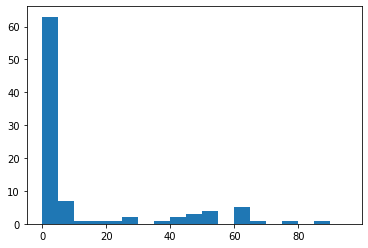

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(sports_df.price,bins=bin_edges)
plt.show()

In [24]:
max(sports_df.price)

495.0

In [25]:
sports_df.loc[sports_df.price == 0,['event_id','local_start_dt','local_end_dt','created_dt','published_dt']]

event_id       local_start_dt         local_end_dt  \
0   66702120839  2019-09-20T12:00:00  2019-09-21T21:00:00   
1   61927175850  2019-10-17T19:00:00  2020-04-25T22:00:00   
2   64868845463  2019-09-22T12:00:00  2019-09-22T19:00:00   
4   63424273710  2019-10-17T19:00:00  2019-10-17T23:00:00   
5   65715012371  2019-11-10T10:00:00  2019-11-17T19:00:00   
..          ...                  ...                  ...   
93  51444645319  2019-10-26T07:30:00  2019-10-26T16:30:00   
94  55778855057  2019-10-12T09:00:00  2019-10-12T17:00:00   
95  67038091737  2019-09-29T10:00:00  2019-09-29T16:00:00   
97  70462097029  2019-09-19T16:00:00  2019-09-19T19:00:00   
99  66905816097  2019-11-02T09:00:00  2019-11-02T13:00:00   

              created_dt          published_dt  
0   2019-07-26T18:30:23Z  2019-07-30T17:12:21Z  
1   2019-05-15T12:21:32Z  2019-05-15T12:38:18Z  
2   2019-07-06T12:27:12Z  2019-07-06T13:00:36Z  
4   2019-06-13T10:47:57Z  2019-06-13T11:01:14Z  
5   2019-07-17T18:05:53Z  2019-07-25T15:04:16Z  
..                   ...                   ...  
93  2018-10-16T01:42:41Z  2018-10-16T01:42:45Z  
94  2019-02-01T18:27:09Z  2019-02-01T23:24:47Z  
95  2019-07-30T15:56:57Z  2019-07-30T16:01:30Z  
97  2019-08-26T04:45:31Z  2019-08-26T04:54:47Z  
99  2019-07-29T16:13:48Z  2019-07-29T16:16:16Z  

[63 rows x 5 columns]

In [26]:
sports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
event_name        100 non-null object
event_id          100 non-null object
organizer         100 non-null object
organization      100 non-null object
local_start_dt    100 non-null object
local_end_dt      100 non-null object
created_dt        100 non-null object
published_dt      100 non-null object
price             100 non-null object
dtypes: object(9)
memory usage: 7.2+ KB


In [27]:
request_json

{'pagination': {'object_count': 8250,
  'page_number': 2,
  'page_size': 50,
  'page_count': 165,
  'has_more_items': True},
 'events': [{'name': {'text': 'Colour Run', 'html': 'Colour Run'},
   'description': {'text': 'Monday 23 September 2019, 4-6pm - FREE to all students and staff of the university. FREE t-shirt for all entrants',
    'html': 'Monday 23 September 2019, 4-6pm - FREE to all students and staff of the university. FREE t-shirt for all entrants'},
   'id': '66684415883',
   'url': 'https://www.eventbrite.co.uk/e/colour-run-tickets-66684415883?aff=ebapi',
   'start': {'timezone': 'Europe/London',
    'local': '2019-09-23T16:00:00',
    'utc': '2019-09-23T15:00:00Z'},
   'end': {'timezone': 'Europe/London',
    'local': '2019-09-23T18:00:00',
    'utc': '2019-09-23T17:00:00Z'},
   'organization_id': '90402217607',
   'created': '2019-07-26T15:09:46Z',
   'changed': '2019-08-31T17:37:03Z',
   'published': '2019-07-26T15:37:28Z',
   'capacity': None,
   'capacity_is_custom': 

In [28]:
sports_df['local_start_dt'] = pd.to_datetime(sports_df['local_start_dt'],infer_datetime_format=True)
sports_df['local_end_dt'] = pd.to_datetime(sports_df['local_end_dt'],infer_datetime_format=True)
sports_df['created_dt'] = pd.to_datetime(sports_df['created_dt'],infer_datetime_format=True)
sports_df['published_dt'] = pd.to_datetime(sports_df['published_dt'],infer_datetime_format=True)

In [29]:
sports_df.sort_values(by=['created_dt'])

event_name     event_id  \
6     Southwest Warriors-Registration-Tickets-Apparel  10628761913   
37  Sign Up to Stay Informed About Bell Joy Ride —...  22240494919   
75                                 50+ Disc Golf Club  26984535472   
68                                 GFNY URUGUAY CLUB   37368444022   
29                 Event Waiver @ Somers Sports Arena  37415609094   
..                                                ...          ...   
86      Fitbit Local Power Yoga & Bodyweight Bootcamp  71434513553   
59             BGSU Hockey Season Ticket Holder Party  71545168525   
69        Bend on Bridge Park Ave with Barre3 & Rebol  71692292577   
9                     WAMI - Yoga Sotto Le Stelle 3.0  72051374601   
65  REEBOK Presents: Midnight Runners 7k Bootcamp,...  72245156207   

      organizer  organization      local_start_dt        local_end_dt  \
6    1880150567   17032646729 2018-05-11 17:00:00 2020-09-23 23:00:00   
37   9857557238  167352192090 2017-01-31 19:00:00 2019-12-29 22:00:00   
75  10674141594  173307282955 2035-12-30 13:00:00 2035-12-31 13:00:00   
68   8767323653  159761206564 2018-12-29 08:00:00 2026-03-27 08:00:00   
29  14901636350  223638375523 2017-08-29 10:00:00 2019-12-31 14:00:00   
..          ...           ...                 ...                 ...   
86   8468688740  126951379279 2019-09-26 18:30:00 2019-09-26 19:30:00   
59  25338978873  315975409699 2019-09-28 11:00:00 2019-09-28 13:30:00   
69   7897242422  104273390857 2019-09-28 08:30:00 2019-09-28 09:30:00   
9   14968175889  221555852194 2019-09-28 19:00:00 2019-09-28 21:00:00   
65  10968470575  158637727881 2019-09-25 19:00:00 2019-09-25 20:30:00   

            created_dt        published_dt  price  
6  2014-02-14 15:57:19 2014-02-14 16:06:35  49.99  
37 2016-02-25 22:20:28 2016-02-25 22:20:30      0  
75 2016-08-06 17:59:11 2016-08-06 18:01:51      0  
68 2017-08-27 16:29:41 2017-08-27 16:40:58      0  
29 2017-08-29 12:15:47 2017-08-29 12:30:29      0  
..                 ...                 ...    ...  
86 2019-09-03 21:50:04 2019-09-03 21:55:48      0  
59 2019-09-04 18:05:01 2019-09-04 18:10:39      0  
69 2019-09-05 18:15:54 2019-09-05 18:25:58      0  
9  2019-09-09 08:42:57 2019-09-09 08:50:06      0  
65 2019-09-10 13:42:32 2019-09-10 14:21:25      0  

[100 rows x 9 columns]

check

In [473]:
event_df.append(event_dict)

TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [441]:
event_json = request_json

for tier_num, tier in enumerate(event_json['ticket_classes']):
    try:
        ticket_properties = [{'cost_' + str(tier_num) : tier['cost']['major_value'],
                                  'fee_' + str(tier_num) : tier['fee']['major_value'],
                                  'tax_' + str(tier_num) : tier['tax']['major_value'],
                                  'donation_' + str(tier_num) : tier['donation'],
                                  'free_' + str(tier_num) : tier['free'],
                                  'maximum_quantity_' + str(tier_num) : tier['maximum_quantity'],
                                  'on_sale_status_' + str(tier_num) : tier['on_sale_status'],
                                  'include_fee_' + str(tier_num) : tier['include_fee']}]
    except TypeError:

        try:
            ticket_properties = [{'cost_' + str(tier_num) : 0,
                                      'fee_' + str(tier_num) : 0,
                                      'tax_' + str(tier_num) : 0,
                                      'donation_' + str(tier_num) : tier['donation'],
                                      'free_' + str(tier_num) : tier['free'],
                                      'maximum_quantity_' + str(tier_num) : tier['maximum_quantity'],
                                      'on_sale_status_' + str(tier_num) : tier['on_sale_status'],
                                      'include_fee_' + str(tier_num) : tier['include_fee']}]
        except TypeError:
            print('Fatal TypeError2 for event properties. Event_id: %s' % event_id)
            continue
        
        event_properties = event_properties.append(ticket_properties)

AttributeError: 'NoneType' object has no attribute 'append'

In [442]:
event_properties

In [394]:
event_json['ticket_classes']

[{'actual_cost': {'display': '$1,000.00',
   'currency': 'USD',
   'value': 100000,
   'major_value': '1000.00'},
  'actual_fee': {'display': '$65.84',
   'currency': 'USD',
   'value': 6584,
   'major_value': '65.84'},
  'cost': {'display': '$1,000.00',
   'currency': 'USD',
   'value': 100000,
   'major_value': '1000.00'},
  'fee': {'display': '$65.84',
   'currency': 'USD',
   'value': 6584,
   'major_value': '65.84'},
  'tax': {'display': '$15.94',
   'currency': 'USD',
   'value': 1594,
   'major_value': '15.94'},
  'resource_uri': 'https://www.eventbriteapi.com/v3/events/73301249009/ticket_classes/131022559/',
  'display_name': 'General Admission',
  'name': 'General Admission',
  'description': None,
  'sorting': 1,
  'donation': False,
  'free': False,
  'minimum_quantity': 1,
  'maximum_quantity': 10,
  'maximum_quantity_per_order': 10,
  'on_sale_status': 'AVAILABLE',
  'has_pdf_ticket': True,
  'order_confirmation_message': None,
  'delivery_methods': ['electronic'],
  'cate

In [400]:
event_json['ticket_classes'][1]['cost']

None


In [432]:
tier_num = 1
tier = event_json['ticket_classes'][1]


for tier_num, tier in enumerate(event_json['ticket_classes']):
    try:
        ticket_properties = [{'cost_' + str(tier_num) : tier['cost']['major_value'],
                                  'fee_' + str(tier_num) : tier['fee']['major_value'],
                                  'tax_' + str(tier_num) : tier['tax']['major_value'],
                                  'donation_' + str(tier_num) : tier['donation'],
                                  'free_' + str(tier_num) : tier['free'],
                                  'maximum_quantity_' + str(tier_num) : tier['maximum_quantity'],
                                  'on_sale_status_' + str(tier_num) : tier['on_sale_status'],
                                  'include_fee_' + str(tier_num) : tier['include_fee']}]
    except TypeError:
        
        try:
            ticket_properties = [{'cost_' + str(tier_num) : 0,
                                      'fee_' + str(tier_num) : 0,
                                      'tax_' + str(tier_num) : 0,
                                      'donation_' + str(tier_num) : tier['donation'],
                                      'free_' + str(tier_num) : tier['free'],
                                      'maximum_quantity_' + str(tier_num) : tier['maximum_quantity'],
                                      'on_sale_status_' + str(tier_num) : tier['on_sale_status'],
                                      'include_fee_' + str(tier_num) : tier['include_fee']}]
        except TypeError:
            print('NoneType Error')

In [393]:
ticket_properties = [{'cost_' + str(tier_num) : tier['cost']['major_value'],
                              'fee_' + str(tier_num) : tier['fee']['major_value'],
                              'tax_' + str(tier_num) : tier['tax']['major_value'],
                              'donation_' + str(tier_num) : tier['donation'],
                              'free_' + str(tier_num) : tier['free'],
                              'maximum_quantity_' + str(tier_num) : tier['maximum_quantity'],
                              'on_sale_status_' + str(tier_num) : tier['on_sale_status'],
                              'include_fee_' + str(tier_num) : tier['include_fee']}
                             for tier_num, tier in enumerate(event_json['ticket_classes'])]

TypeError: 'NoneType' object is not subscriptable

In [385]:
{key: value for d in event_properties for key, value in d.items()}

{'id': '48782412509',
 'start_tz': 'America/Los_Angeles',
 'start_local_dt': '2018-09-01T21:30:00',
 'end_local_dt': '2018-09-01T23:00:00',
 'created_dt': '2018-08-05T23:27:51Z',
 'published_dt': '2018-08-05T23:28:57Z',
 'currency': 'USD',
 'listed': True,
 'shareable': True,
 'online_event': False,
 'locale': 'en_US',
 'is_series': False,
 'is_series_parent': False,
 'inventory_type': 'limited',
 'is_reserved_seating': False,
 'venue_id': '22687889',
 'category_id': '105',
 'subcategory_id': '5010',
 'format_id': '6',
 'city': 'Oakland',
 'region': 'CA',
 'postal_code': '94612',
 'country': 'US',
 'refund_policy': 'flexible',
 'refund_retention_policy': None,
 'is_paid': True,
 'has_available_tickets': False,
 'is_sold_out': True,
 'waitlist_available': False,
 'cost0': '18.00',
 'fee0': '0.00',
 'tax0': '0.00',
 'donation0': False,
 'free0': False,
 'maximum_quantity0': 20,
 'on_sale_status0': 'UNAVAILABLE',
 'include_fee0': True,
 'cost1': '25.00',
 'fee1': '0.00',
 'tax1': '0.00',


In [374]:
event_properties[0].items()

dict_items([('id', '48782412509'), ('start_tz', 'America/Los_Angeles'), ('start_local_dt', '2018-09-01T21:30:00'), ('end_local_dt', '2018-09-01T23:00:00'), ('created_dt', '2018-08-05T23:27:51Z'), ('published_dt', '2018-08-05T23:28:57Z'), ('currency', 'USD'), ('listed', True), ('shareable', True), ('online_event', False), ('locale', 'en_US'), ('is_series', False), ('is_series_parent', False), ('inventory_type', 'limited'), ('is_reserved_seating', False), ('venue_id', '22687889'), ('category_id', '105'), ('subcategory_id', '5010'), ('format_id', '6'), ('city', 'Oakland'), ('region', 'CA'), ('postal_code', '94612'), ('country', 'US'), ('refund_policy', 'flexible'), ('refund_retention_policy', None), ('is_paid', True), ('has_available_tickets', False), ('is_sold_out', True), ('waitlist_available', False), ('cost0', '18.00'), ('fee0', '0.00'), ('tax0', '0.00'), ('donation0', False), ('free0', False), ('maximum_quantity0', 20), ('on_sale_status0', 'UNAVAILABLE'), ('include_fee0', True)])

In [36]:
def get_keys_from_file(filename):
    import imp
    f = open(filename)
    global keys
    keys = imp.load_source('keys',filename)
    f.close()
    
get_keys_from_file('/Users/peterschnatz/Insight/Project1/RightPrice/eventbrite_keys.py')

eventbrite_api_token = keys.PRIVATE_TOKEN

eventbrite_api_base = keys.base

In [3]:
request = requests.get(eventbrite_api_base+'events/68291233919/?expand=venue,organizer,format,category,subcategory,bookmark_info,refund_policy,ticket_classes,ticket_availability,external_ticketing,music_properties,publish_settings,guestlist_metrics,listing_properties&token='+eventbrite_api_token)
request_json = request.json()

In [4]:
print('Name: %s\nOrganizer:    %s\nOrganization: %s' % (request_json['name']['text'],request_json['organizer_id'],request_json['organization_id']))

Name: Therapeutic Yoga
Organizer:    18291367526
Organization: 283974720005


In [5]:
request = requests.get(eventbrite_api_base+'events/search/?categories=107&subcategories=7005&expand=ticket_classes&location.address=newyork&expand=ticket_classes&token='+eventbrite_api_token)
request_json = request.json()
request_json

{'pagination': {'object_count': 171,
  'page_number': 1,
  'page_size': 50,
  'page_count': 4,
  'has_more_items': True},
 'events': [{'name': {'text': "Meditation as Medication: A Doctor's Perspective",
    'html': 'Meditation as Medication: A Doctor&#39;s Perspective'},
   'description': {'text': "Can meditation improve high blood pressure, anxiety, depression, or pain? \xa0\r\n\r\nIf a doctor told you to meditate, would you hesitate?\r\nScience of Spirituality Presents\r\nMeditation as Medication:\xa0A Doctor's Perspective\r\nMeet with top Medical Experts and Researchers and learn how meditation has changed them and their patients. \xa0Both speakers are co-authors of the book - Meditation as Medication, a best seller!\r\nRetreat is FREE of Charge\r\nSaturday, September 28, 2019\xa0\r\n10.30 AM – Registration & Welcome\r\n11 AM – 12.30 PM\r\nMeditation for Body, Mind and Soul: Meditation Experiences within Clinical Practices\r\nSpeaker: Dr. Matt Raider, M.D., Medical Director, CT\r\n

In [6]:
request_json['pagination']

{'object_count': 171,
 'page_number': 1,
 'page_size': 50,
 'page_count': 4,
 'has_more_items': True}

In [7]:
yoga_df = pd.DataFrame()

In [8]:
event_properties = [{'event_name':event['name']['text'],
                     'organizer':event['organizer_id'],
                     'organization':event['organization_id'],
                     'price':event['ticket_classes'][0]['cost']} 
                    for event in request_json['events']]

In [9]:
yoga_df = pd.DataFrame(event_properties)

In [10]:
yoga_df.price.fillna(value=0,inplace=True)

In [11]:
yoga_df.iloc[0]

event_name      Meditation as Medication: A Doctor's Perspective
organizer                                             2583029518
organization                                         38243310276
price                                                          0
Name: 0, dtype: object

In [12]:
yoga_df.price[0]

0

In [13]:
for row,value in enumerate(yoga_df.price):
    if value != 0:
        yoga_df.price[row] = float(value['major_value'])

In [14]:
yoga_df

event_name    organizer  \
0    Meditation as Medication: A Doctor's Perspective   2583029518   
1             Free Yoga Class: Yoga Basics and Breath  15386741481   
2                             Yoga in the Garden 2019   2339390903   
3                        Yoga in the Fort Greene Park  18937400320   
4                                         Gentle Yoga  12813753767   
5           Community Sputnik Yoga (FREE) @378 Throop   3548334683   
6   DRUNK YOGA® at Row NYC...FREE Wine! Saturdays ...  15821524808   
7   DUMBO SOCIAL INFLUENCER EVENT (+ barre class!)...  12054388158   
8                      BK Yoga Club: BK Morning Beats  18570445492   
9                                  Beginner Yogalates  18291367526   
10                                 Advanced Yogalates  18291367526   
11                                           ViniYoga  18291367526   
12  Tune In - Restorative Yoga & Himalayan Singing...  20312271518   
13                   Rooftop Yoga for People of Color  17989031888   
14  Meditate and Chill: Connecting singles with in...   8005609720   
15                      Fall Equinox Yoga & Gong Bath  12753750665   
16  FREE Outdoor Sunset Yoga by Setu + Chelsea Pie...  18094224115   
17  BDCFit Free Open House: Yoga, Pilates, Barre (...  19837364276   
18                       "La Femme Rose" Women Temple   6155004533   
19                                    Between Breaths  26377634925   
20  Yoga Mash-Up: Vinyasa Flow with African Drums ...  20221029262   
21                      Flow Into Fall with thecnnekt  11484455361   
22  Root to Rise: Community Flow - Yoga with BK Bu...  20021479121   
23                                 Joyful Rebel Yoga   26471986797   
24        Sip & Stretch: Unlimited Rosé and Self-Care  18319322853   
25  From the Bottom UP: A Chakra Balancing Kundali...   4790485295   
26                     Yoga Savvy: Sunny Rooftop Yoga  26366582093   
27       Self-Care Event for the Helping Professional  14138147076   
28       Tuesday Night Beginners Yoga with Hope Asana  15176314733   
29   Meditation and Yoga on Englewood Field Club Lawn  12813753767   
30  Drunk Yoga® at EVEN Hotel...FREE Wine! *Thursd...  15821524808   
31             Weekly Naam Class with Primavera Salvá  15403909824   
32                   Free Yoga Class during September  19837007798   
33  Secrets to Meditation in New York, NY - An Int...  20103667440   
34                    1st Thursday Network Yoga & Sip  26853464579   
35                           Intro to Kundalini Yoga   17608806814   
36                             The Healthy Happy Hour  26859365599   
37  Beyond Meditation - An Introduction to Sahaj S...  20103667440   
38  Yoga & Yoni Self Care - Make Your Own Yoni Ste...  19995498521   
39                           Sunset Yoga by Pyoga Lab  15498884022   
40  Beyond Meditation - An Introduction to Sahaj S...  20103667440   
41                       Tuesday Tabata & Tranquility   4790485295   
42                         Connecting Yoga & Ayurveda   4790485295   
43                  New Moon In Libra: Goddess Circle  23387702889   
44                  Misha Nonoo x Sky Ting Yoga Class  22650013962   
45  The BT Group x BK Yoga Club Presents: Afrobeat...  18570445492   
46                                               YOGA  26904052231   
47  poise + prana: exploring pilates through the s...  23459407331   
48           All White Goddess Gathering : Photoshoot  14405055447   
49                                    Fire Power Yoga  17695358464   

    organization  price  
0    38243310276      0  
1   218201622803      0  
2    33673116301      0  
3   293950156663      0  
4   201474657973     10  
5    53980502862      0  
6   236398958683     45  
7   166625625478      0  
8   289358742177     20  
9   283974720005    100  
10  283974720005    100  
11  283974720005    100  
12  228941257663     45  
13  277085064664     20  
14   19740631856     25  
15   59070822407  21.83  
16  280622578125      0  
17  

In [15]:
request = requests.get(eventbrite_api_base+'categories/?token='+eventbrite_api_token)
request.json()

{'locale': 'en_US',
 'pagination': {'object_count': 21,
  'page_number': 1,
  'page_size': 50,
  'page_count': 1,
  'has_more_items': False},
 'categories': [{'resource_uri': 'https://www.eventbriteapi.com/v3/categories/103/',
   'id': '103',
   'name': 'Music',
   'name_localized': 'Music',
   'short_name': 'Music',
   'short_name_localized': 'Music'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/101/',
   'id': '101',
   'name': 'Business & Professional',
   'name_localized': 'Business & Professional',
   'short_name': 'Business',
   'short_name_localized': 'Business'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/110/',
   'id': '110',
   'name': 'Food & Drink',
   'name_localized': 'Food & Drink',
   'short_name': 'Food & Drink',
   'short_name_localized': 'Food & Drink'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/113/',
   'id': '113',
   'name': 'Community & Culture',
   'name_localized': 'Community & Culture',
   'short

In [16]:
request = requests.get(eventbrite_api_base+'subcategories/?continuation=eyJwYWdlIjogMn0&token='+eventbrite_api_token)
request.json()

{'pagination': {'object_count': 197,
  'page_number': 2,
  'page_size': 50,
  'page_count': 4,
  'continuation': 'eyJwYWdlIjogM30',
  'has_more_items': True},
 'subcategories': [{'resource_uri': 'https://www.eventbriteapi.com/v3/subcategories/5004/',
   'id': '5004',
   'name': 'Dance',
   'name_localized': 'Dance',
   'parent_category': {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/105/',
    'id': '105',
    'name': 'Performing & Visual Arts',
    'name_localized': 'Performing & Visual Arts',
    'short_name': 'Arts',
    'short_name_localized': 'Arts'}},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/subcategories/5005/',
   'id': '5005',
   'name': 'Opera',
   'name_localized': 'Opera',
   'parent_category': {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/105/',
    'id': '105',
    'name': 'Performing & Visual Arts',
    'name_localized': 'Performing & Visual Arts',
    'short_name': 'Arts',
    'short_name_localized': 'Arts'}},
  {'resource_uri

In [17]:
request = requests.get(eventbrite_api_base+'events/search/?page=2&location.address=usa&categories=108&expand=venue,organizer,format,category,subcategory,bookmark_info,refund_policy,ticket_classes,ticket_availability,external_ticketing,music_properties,publish_settings,guestlist_metrics,listing_properties&token='+eventbrite_api_token)
request_json = request.json()
num_pages = request_json['pagination']['page_count']

In [18]:
request_json

{'pagination': {'object_count': 2430,
  'page_number': 2,
  'page_size': 50,
  'page_count': 49,
  'has_more_items': True},
 'events': [{'name': {'text': '*FREE* International BigTime Wrestling',
    'html': '*FREE* International BigTime Wrestling'},
   'description': {'text': 'International BigTime Wrestling',
    'html': 'International BigTime Wrestling'},
   'id': '70683242481',
   'url': 'https://www.eventbrite.com/e/free-international-bigtime-wrestling-tickets-70683242481?aff=ebapi',
   'start': {'timezone': 'America/Detroit',
    'local': '2019-09-29T15:00:00',
    'utc': '2019-09-29T19:00:00Z'},
   'end': {'timezone': 'America/Detroit',
    'local': '2019-09-29T18:00:00',
    'utc': '2019-09-29T22:00:00Z'},
   'organization_id': '262767704819',
   'created': '2019-08-27T19:39:25Z',
   'changed': '2019-08-27T19:44:31Z',
   'published': '2019-08-27T19:41:46Z',
   'capacity': None,
   'capacity_is_custom': None,
   'status': 'live',
   'currency': 'USD',
   'listed': True,
   'shar

In [19]:
def add_data_to_df(request_json,current_df):
    event_properties = [{'event_name':event['name']['text'],
                         'event_id':event['id'],
                         'organizer':event['organizer_id'],
                         'organization':event['organization_id'],
                         'local_start_dt':event['start']['local'],
                         'local_end_dt':event['end']['local'],
                         'created_dt':event['created'],
                         'published_dt':event['published'],
                         'price':event['ticket_classes'][0]['cost']}
                        for event in request_json['events']]
    temp_df = pd.DataFrame(event_properties)
    return pd.concat([current_df,temp_df],axis=0).reset_index(drop=True)

In [20]:
sports_df = pd.DataFrame()

request = requests.get(eventbrite_api_base+'events/search/?categories=108&expand=ticket_classes&token='+eventbrite_api_token)
request_json = request.json()
num_pages = request_json['pagination']['page_count']

print(num_pages)

sports_df = add_data_to_df(request_json,sports_df)

for page in range(1,2):
    request = requests.get(eventbrite_api_base+'events/search/?categories=108&expand=ticket_classes&page='+str(page+1)+'&token='+eventbrite_api_token)
    request_json = request.json()
    sports_df = add_data_to_df(request_json,sports_df)



166


In [21]:
sports_df.price.fillna(value=0,inplace=True)

for row,value in enumerate(sports_df.price):
    if value != 0:
        sports_df.price[row] = float(value['major_value'])

In [22]:
bin_edges = [edge for edge in range(0,100,5)]

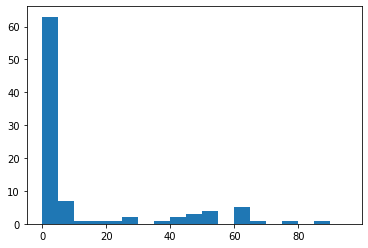

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(sports_df.price,bins=bin_edges)
plt.show()

In [24]:
max(sports_df.price)

495.0

In [25]:
sports_df.loc[sports_df.price == 0,['event_id','local_start_dt','local_end_dt','created_dt','published_dt']]

event_id       local_start_dt         local_end_dt  \
0   66702120839  2019-09-20T12:00:00  2019-09-21T21:00:00   
1   61927175850  2019-10-17T19:00:00  2020-04-25T22:00:00   
2   64868845463  2019-09-22T12:00:00  2019-09-22T19:00:00   
4   63424273710  2019-10-17T19:00:00  2019-10-17T23:00:00   
5   65715012371  2019-11-10T10:00:00  2019-11-17T19:00:00   
..          ...                  ...                  ...   
93  51444645319  2019-10-26T07:30:00  2019-10-26T16:30:00   
94  55778855057  2019-10-12T09:00:00  2019-10-12T17:00:00   
95  67038091737  2019-09-29T10:00:00  2019-09-29T16:00:00   
97  70462097029  2019-09-19T16:00:00  2019-09-19T19:00:00   
99  66905816097  2019-11-02T09:00:00  2019-11-02T13:00:00   

              created_dt          published_dt  
0   2019-07-26T18:30:23Z  2019-07-30T17:12:21Z  
1   2019-05-15T12:21:32Z  2019-05-15T12:38:18Z  
2   2019-07-06T12:27:12Z  2019-07-06T13:00:36Z  
4   2019-06-13T10:47:57Z  2019-06-13T11:01:14Z  
5   2019-07-17T18:05:53Z  2019-07-25T15:04:16Z  
..                   ...                   ...  
93  2018-10-16T01:42:41Z  2018-10-16T01:42:45Z  
94  2019-02-01T18:27:09Z  2019-02-01T23:24:47Z  
95  2019-07-30T15:56:57Z  2019-07-30T16:01:30Z  
97  2019-08-26T04:45:31Z  2019-08-26T04:54:47Z  
99  2019-07-29T16:13:48Z  2019-07-29T16:16:16Z  

[63 rows x 5 columns]

In [26]:
sports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
event_name        100 non-null object
event_id          100 non-null object
organizer         100 non-null object
organization      100 non-null object
local_start_dt    100 non-null object
local_end_dt      100 non-null object
created_dt        100 non-null object
published_dt      100 non-null object
price             100 non-null object
dtypes: object(9)
memory usage: 7.2+ KB


In [27]:
request_json

{'pagination': {'object_count': 8250,
  'page_number': 2,
  'page_size': 50,
  'page_count': 165,
  'has_more_items': True},
 'events': [{'name': {'text': 'Colour Run', 'html': 'Colour Run'},
   'description': {'text': 'Monday 23 September 2019, 4-6pm - FREE to all students and staff of the university. FREE t-shirt for all entrants',
    'html': 'Monday 23 September 2019, 4-6pm - FREE to all students and staff of the university. FREE t-shirt for all entrants'},
   'id': '66684415883',
   'url': 'https://www.eventbrite.co.uk/e/colour-run-tickets-66684415883?aff=ebapi',
   'start': {'timezone': 'Europe/London',
    'local': '2019-09-23T16:00:00',
    'utc': '2019-09-23T15:00:00Z'},
   'end': {'timezone': 'Europe/London',
    'local': '2019-09-23T18:00:00',
    'utc': '2019-09-23T17:00:00Z'},
   'organization_id': '90402217607',
   'created': '2019-07-26T15:09:46Z',
   'changed': '2019-08-31T17:37:03Z',
   'published': '2019-07-26T15:37:28Z',
   'capacity': None,
   'capacity_is_custom': 

In [28]:
sports_df['local_start_dt'] = pd.to_datetime(sports_df['local_start_dt'],infer_datetime_format=True)
sports_df['local_end_dt'] = pd.to_datetime(sports_df['local_end_dt'],infer_datetime_format=True)
sports_df['created_dt'] = pd.to_datetime(sports_df['created_dt'],infer_datetime_format=True)
sports_df['published_dt'] = pd.to_datetime(sports_df['published_dt'],infer_datetime_format=True)

In [29]:
sports_df.sort_values(by=['created_dt'])

event_name     event_id  \
6     Southwest Warriors-Registration-Tickets-Apparel  10628761913   
37  Sign Up to Stay Informed About Bell Joy Ride —...  22240494919   
75                                 50+ Disc Golf Club  26984535472   
68                                 GFNY URUGUAY CLUB   37368444022   
29                 Event Waiver @ Somers Sports Arena  37415609094   
..                                                ...          ...   
86      Fitbit Local Power Yoga & Bodyweight Bootcamp  71434513553   
59             BGSU Hockey Season Ticket Holder Party  71545168525   
69        Bend on Bridge Park Ave with Barre3 & Rebol  71692292577   
9                     WAMI - Yoga Sotto Le Stelle 3.0  72051374601   
65  REEBOK Presents: Midnight Runners 7k Bootcamp,...  72245156207   

      organizer  organization      local_start_dt        local_end_dt  \
6    1880150567   17032646729 2018-05-11 17:00:00 2020-09-23 23:00:00   
37   9857557238  167352192090 2017-01-31 19:00:00 2019-12-29 22:00:00   
75  10674141594  173307282955 2035-12-30 13:00:00 2035-12-31 13:00:00   
68   8767323653  159761206564 2018-12-29 08:00:00 2026-03-27 08:00:00   
29  14901636350  223638375523 2017-08-29 10:00:00 2019-12-31 14:00:00   
..          ...           ...                 ...                 ...   
86   8468688740  126951379279 2019-09-26 18:30:00 2019-09-26 19:30:00   
59  25338978873  315975409699 2019-09-28 11:00:00 2019-09-28 13:30:00   
69   7897242422  104273390857 2019-09-28 08:30:00 2019-09-28 09:30:00   
9   14968175889  221555852194 2019-09-28 19:00:00 2019-09-28 21:00:00   
65  10968470575  158637727881 2019-09-25 19:00:00 2019-09-25 20:30:00   

            created_dt        published_dt  price  
6  2014-02-14 15:57:19 2014-02-14 16:06:35  49.99  
37 2016-02-25 22:20:28 2016-02-25 22:20:30      0  
75 2016-08-06 17:59:11 2016-08-06 18:01:51      0  
68 2017-08-27 16:29:41 2017-08-27 16:40:58      0  
29 2017-08-29 12:15:47 2017-08-29 12:30:29      0  
..                 ...                 ...    ...  
86 2019-09-03 21:50:04 2019-09-03 21:55:48      0  
59 2019-09-04 18:05:01 2019-09-04 18:10:39      0  
69 2019-09-05 18:15:54 2019-09-05 18:25:58      0  
9  2019-09-09 08:42:57 2019-09-09 08:50:06      0  
65 2019-09-10 13:42:32 2019-09-10 14:21:25      0  

[100 rows x 9 columns]

check

In [371]:
test_df = pd.DataFrame(event_properties)
test_df

id             start_tz       start_local_dt         end_local_dt  \
0  48782412509  America/Los_Angeles  2018-09-01T21:30:00  2018-09-01T23:00:00   
1  48782412509  America/Los_Angeles  2018-09-01T21:30:00  2018-09-01T23:00:00   
2  48782412509  America/Los_Angeles  2018-09-01T21:30:00  2018-09-01T23:00:00   
3  48782412509  America/Los_Angeles  2018-09-01T21:30:00  2018-09-01T23:00:00   
4  48782412509  America/Los_Angeles  2018-09-01T21:30:00  2018-09-01T23:00:00   

             created_dt          published_dt currency  listed  shareable  \
0  2018-08-05T23:27:51Z  2018-08-05T23:28:57Z      USD    True       True   
1  2018-08-05T23:27:51Z  2018-08-05T23:28:57Z      USD    True       True   
2  2018-08-05T23:27:51Z  2018-08-05T23:28:57Z      USD    True       True   
3  2018-08-05T23:27:51Z  2018-08-05T23:28:57Z      USD    True       True   
4  2018-08-05T23:27:51Z  2018-08-05T23:28:57Z      USD    True       True   

   online_event  ... on_sale_status3  include_fee3  cost4  fee4  tax4  \
0         False  ...             NaN           NaN    NaN   NaN   NaN   
1         False  ...             NaN           NaN    NaN   NaN   NaN   
2         False  ...             NaN           NaN    NaN   NaN   NaN   
3         False  ...     UNAVAILABLE          True    NaN   NaN   NaN   
4         False  ...             NaN           NaN  21.00  0.00  0.00   

  donation4  free4 maximum_quantity4 on_sale_status4 include_fee4  
0       NaN    NaN               NaN             NaN          NaN  
1       NaN    NaN               NaN             NaN          NaN  
2       NaN    NaN               NaN             NaN          NaN  
3       NaN    NaN               NaN             NaN          NaN  
4     False  False               NaN        SOLD_OUT         True  

[5 rows x 69 columns]

In [350]:
test_df = pd.DataFrame(event_properties)
test_df

id         start_tz       start_local_dt         end_local_dt  \
0  46844131057  America/Chicago  2018-09-03T09:00:00  2018-09-03T17:00:00   
1  46844131057  America/Chicago  2018-09-03T09:00:00  2018-09-03T17:00:00   
2  46844131057  America/Chicago  2018-09-03T09:00:00  2018-09-03T17:00:00   

             created_dt          published_dt currency  listed  shareable  \
0  2018-06-07T13:32:09Z  2018-06-07T13:43:31Z      USD    True       True   
1  2018-06-07T13:32:09Z  2018-06-07T13:43:31Z      USD    True       True   
2  2018-06-07T13:32:09Z  2018-06-07T13:43:31Z      USD    True       True   

   online_event  ... on_sale_status1  include_fee1  cost2  fee2  tax2  \
0         False  ...             NaN           NaN    NaN   NaN   NaN   
1         False  ...     UNAVAILABLE         False    NaN   NaN   NaN   
2         False  ...             NaN           NaN  30.00  3.72  0.00   

  donation2  free2 maximum_quantity2 on_sale_status2 include_fee2  
0       NaN    NaN               NaN             NaN          NaN  
1       NaN    NaN               NaN             NaN          NaN  
2     False  False               1.0     UNAVAILABLE        False  

[3 rows x 53 columns]

In [345]:
{'id' : event_json['id'],
                        'start_tz' : event_json['start']['timezone'],
                        'start_local_dt' : event_json['start']['local'],
                        'end_local_dt' : event_json['end']['local'],
                        'created_dt' : event_json['created'],
                        'published_dt' : event_json['published'],
                        'currency' : event_json['currency'],
                        'listed' : event_json['listed'],
                        'shareable' : event_json['shareable'],
                        'online_event' : event_json['online_event'],
                        'locale' : event_json['locale'],
                        'is_series' : event_json['is_series'],
                        'is_series_parent' : event_json['is_series_parent'],
                        'inventory_type' : event_json['inventory_type'],
                        'is_reserved_seating' : event_json['is_reserved_seating'],
                        'venue_id' : event_json['venue_id'],
                        'category_id' : event_json['category_id'],
                        'subcategory_id' : event_json['subcategory_id'],
                        'format_id' : event_json['format_id'],
                        'city' : event_json['venue']['address']['city'],
                        'region' : event_json['venue']['address']['region'],
                        'postal_code' : event_json['venue']['address']['postal_code'],
                        'country' : event_json['venue']['address']['country'],
                        'refund_policy' : event_json['refund_policy']['refund_policy'],
                        'refund_retention_policy' : event_json['refund_policy']['refund_retention_policy'],
                        'is_paid' : event_json['listing_properties']['is_paid'],
                        'has_available_tickets' : event_json['ticket_availability']['has_available_tickets'],
                        'is_sold_out' : event_json['ticket_availability']['is_sold_out'],
                        'waitlist_available' : event_json['ticket_availability']['waitlist_available']}

{'id': '46844131057',
 'start_tz': 'America/Chicago',
 'start_local_dt': '2018-09-03T09:00:00',
 'end_local_dt': '2018-09-03T17:00:00',
 'created_dt': '2018-06-07T13:32:09Z',
 'published_dt': '2018-06-07T13:43:31Z',
 'currency': 'USD',
 'listed': True,
 'shareable': True,
 'online_event': False,
 'locale': 'en_US',
 'is_series': False,
 'is_series_parent': False,
 'inventory_type': 'limited',
 'is_reserved_seating': False,
 'venue_id': '25149064',
 'category_id': '111',
 'subcategory_id': '11999',
 'format_id': '15',
 'city': 'Wauconda',
 'region': 'IL',
 'postal_code': '60084',
 'country': 'US',
 'refund_policy': 'no_refunds',
 'refund_retention_policy': None,
 'is_paid': True,
 'has_available_tickets': False,
 'is_sold_out': True,
 'waitlist_available': False}

In [339]:
for tier_num,tier in enumerate(event_json['ticket_classes']):
    print(str(tier_num))
    new_dict = {'cost' + str(tier_num) : tier['cost']['major_value'],
                        'fee' + str(tier_num) : tier['fee']['major_value'],
                        'tax' + str(tier_num) : tier['tax']['major_value'],
                        'donation' + str(tier_num) : tier['donation'],
                        'free' + str(tier_num) : tier['free'],
                        'maximum_quantity' + str(tier_num) : tier['maximum_quantity'],
                        'on_sale_status' + str(tier_num) : tier['on_sale_status'],
                        'include_fee' + str(tier_num) : tier['include_fee']}

0
1
2


In [343]:
event_json

{'name': {'text': "Wauconda Cardboard Boat Regatta - Lindy's Landing - September 1, 2018",
  'html': 'Wauconda Cardboard Boat Regatta - Lindy&#39;s Landing - September 1, 2018'},
 'description': {'text': "Wauconda Cardboard Boat Regatta - proceeds to benefit TLS Veterans -\xa0Saturday, September 1, 2018\nThe Theme for this year is Patriotic!\n3 Divisions - Children's Division (Captain & Crew All 11 & Under), Adult Division (Captain & Crew All 12 & Over), Business Division (Captain & Crew All 16 & Over)\nAwards for Winner in each Division along with Overall Best Dressed, Team Spirit, Spectacular Sinking, Best Design & Theme\nRegistration/Check-In begins at 8:00 AM - Inspections begin at 10:00 AM - Races start at 11:00 AM\nAll boats must be built OFF SITE.\xa0 It is required that all participants pre-register by August 18.\xa0 We will still accept late registrations, but it will cost you!\xa0 The fee will go from $30 to $40 per boat.\nGo to www.tlsveterans.org/events for official rules a

In [307]:
iter_list = [1,2,3,4]

new_list = [{'cow_'+(str(i)) : i} for i in iter_list]
print(new_list)

[{'cow_1': 1}, {'cow_2': 2}, {'cow_3': 3}, {'cow_4': 4}]


In [306]:
print('cow_'.join(str(1)))

1


In [270]:
end_point

{'event_id': '46844131057'}

In [267]:
request.json()

{'status_code': 404,
 'error_description': 'The path you requested does not exist.',
 'error': 'NOT_FOUND'}

In [286]:
request = requests.get(eventbrite_api_base+'events/73301249009/?expand=venue,organizer,format,category,subcategory,bookmark_info,refund_policy,ticket_classes,ticket_availability,external_ticketing,music_properties,publish_settings,guestlist_metrics,listing_properties&token='+eventbrite_api_token)
request_json = request.json()
request_json

{'name': {'text': 'My  big event', 'html': 'My  big event'},
 'description': {'text': '\xa0\nFAQs\n\xa0\nAre there ID or minimum age requirements to enter the event?\nYes. 18+\n\xa0',
  'html': '<P>\xa0</P>\n<P><STRONG>FAQs</STRONG></P>\n<P>\xa0</P>\n<P><STRONG>Are there ID or minimum age requirements to enter the event?</STRONG></P>\n<P>Yes. 18+</P>\n<P>\xa0</P>'},
 'id': '73301249009',
 'url': 'https://www.eventbrite.com/e/my-big-event-tickets-73301249009',
 'start': {'timezone': 'America/New_York',
  'local': '2019-10-28T19:00:00',
  'utc': '2019-10-28T23:00:00Z'},
 'end': {'timezone': 'America/New_York',
  'local': '2019-10-28T22:00:00',
  'utc': '2019-10-29T02:00:00Z'},
 'organization_id': '155018228508',
 'created': '2019-09-18T16:44:42Z',
 'changed': '2019-09-18T17:07:40Z',
 'published': '2019-09-18T16:44:48Z',
 'capacity': 1110,
 'capacity_is_custom': False,
 'status': 'live',
 'currency': 'USD',
 'listed': False,
 'shareable': False,
 'invite_only': False,
 'password': 'mybige

In [285]:
request = requests.get(eventbrite_api_base+'events/46844131057/?expand=venue,organizer,format,category,subcategory,bookmark_info,refund_policy,ticket_classes,ticket_availability,external_ticketing,music_properties,publish_settings,guestlist_metrics,listing_properties&token='+eventbrite_api_token)
request_json = request.json()
request_json

{'name': {'text': "Wauconda Cardboard Boat Regatta - Lindy's Landing - September 1, 2018",
  'html': 'Wauconda Cardboard Boat Regatta - Lindy&#39;s Landing - September 1, 2018'},
 'description': {'text': "Wauconda Cardboard Boat Regatta - proceeds to benefit TLS Veterans -\xa0Saturday, September 1, 2018\nThe Theme for this year is Patriotic!\n3 Divisions - Children's Division (Captain & Crew All 11 & Under), Adult Division (Captain & Crew All 12 & Over), Business Division (Captain & Crew All 16 & Over)\nAwards for Winner in each Division along with Overall Best Dressed, Team Spirit, Spectacular Sinking, Best Design & Theme\nRegistration/Check-In begins at 8:00 AM - Inspections begin at 10:00 AM - Races start at 11:00 AM\nAll boats must be built OFF SITE.\xa0 It is required that all participants pre-register by August 18.\xa0 We will still accept late registrations, but it will cost you!\xa0 The fee will go from $30 to $40 per boat.\nGo to www.tlsveterans.org/events for official rules a

In [300]:
request_json['ticket_classes'][2]

{'actual_cost': {'display': '$500.00',
  'currency': 'USD',
  'value': 50000,
  'major_value': '500.00'},
 'actual_fee': {'display': '$33.81',
  'currency': 'USD',
  'value': 3381,
  'major_value': '33.81'},
 'cost': {'display': '$500.00',
  'currency': 'USD',
  'value': 50000,
  'major_value': '500.00'},
 'fee': {'display': '$33.81',
  'currency': 'USD',
  'value': 3381,
  'major_value': '33.81'},
 'tax': {'display': '$7.98',
  'currency': 'USD',
  'value': 798,
  'major_value': '7.98'},
 'resource_uri': 'https://www.eventbriteapi.com/v3/events/73301249009/ticket_classes/131022563/',
 'display_name': 'Early bird General Admission',
 'name': 'Early bird General Admission',
 'description': None,
 'sorting': 3,
 'donation': False,
 'free': False,
 'minimum_quantity': 1,
 'maximum_quantity': None,
 'maximum_quantity_per_order': 10,
 'on_sale_status': 'AVAILABLE',
 'has_pdf_ticket': True,
 'order_confirmation_message': None,
 'delivery_methods': ['electronic'],
 'category': 'admission',
 '

In [4]:
print('Name: %s\nOrganizer:    %s\nOrganization: %s' % (request_json['name']['text'],request_json['organizer_id'],request_json['organization_id']))

Name: Therapeutic Yoga
Organizer:    18291367526
Organization: 283974720005


In [5]:
request = requests.get(eventbrite_api_base+'events/search/?categories=107&subcategories=7005&expand=ticket_classes&location.address=newyork&expand=ticket_classes&token='+eventbrite_api_token)
request_json = request.json()
request_json

{'pagination': {'object_count': 171,
  'page_number': 1,
  'page_size': 50,
  'page_count': 4,
  'has_more_items': True},
 'events': [{'name': {'text': "Meditation as Medication: A Doctor's Perspective",
    'html': 'Meditation as Medication: A Doctor&#39;s Perspective'},
   'description': {'text': "Can meditation improve high blood pressure, anxiety, depression, or pain? \xa0\r\n\r\nIf a doctor told you to meditate, would you hesitate?\r\nScience of Spirituality Presents\r\nMeditation as Medication:\xa0A Doctor's Perspective\r\nMeet with top Medical Experts and Researchers and learn how meditation has changed them and their patients. \xa0Both speakers are co-authors of the book - Meditation as Medication, a best seller!\r\nRetreat is FREE of Charge\r\nSaturday, September 28, 2019\xa0\r\n10.30 AM – Registration & Welcome\r\n11 AM – 12.30 PM\r\nMeditation for Body, Mind and Soul: Meditation Experiences within Clinical Practices\r\nSpeaker: Dr. Matt Raider, M.D., Medical Director, CT\r\n

In [6]:
request_json['pagination']

{'object_count': 171,
 'page_number': 1,
 'page_size': 50,
 'page_count': 4,
 'has_more_items': True}

In [7]:
yoga_df = pd.DataFrame()

In [8]:
event_properties = [{'event_name':event['name']['text'],
                     'organizer':event['organizer_id'],
                     'organization':event['organization_id'],
                     'price':event['ticket_classes'][0]['cost']} 
                    for event in request_json['events']]

In [9]:
yoga_df = pd.DataFrame(event_properties)

In [10]:
yoga_df.price.fillna(value=0,inplace=True)

In [11]:
yoga_df.iloc[0]

event_name      Meditation as Medication: A Doctor's Perspective
organizer                                             2583029518
organization                                         38243310276
price                                                          0
Name: 0, dtype: object

In [12]:
yoga_df.price[0]

0

In [13]:
for row,value in enumerate(yoga_df.price):
    if value != 0:
        yoga_df.price[row] = float(value['major_value'])

In [14]:
yoga_df

event_name    organizer  \
0    Meditation as Medication: A Doctor's Perspective   2583029518   
1             Free Yoga Class: Yoga Basics and Breath  15386741481   
2                             Yoga in the Garden 2019   2339390903   
3                        Yoga in the Fort Greene Park  18937400320   
4                                         Gentle Yoga  12813753767   
5           Community Sputnik Yoga (FREE) @378 Throop   3548334683   
6   DRUNK YOGA® at Row NYC...FREE Wine! Saturdays ...  15821524808   
7   DUMBO SOCIAL INFLUENCER EVENT (+ barre class!)...  12054388158   
8                      BK Yoga Club: BK Morning Beats  18570445492   
9                                  Beginner Yogalates  18291367526   
10                                 Advanced Yogalates  18291367526   
11                                           ViniYoga  18291367526   
12  Tune In - Restorative Yoga & Himalayan Singing...  20312271518   
13                   Rooftop Yoga for People of Color  17989031888   
14  Meditate and Chill: Connecting singles with in...   8005609720   
15                      Fall Equinox Yoga & Gong Bath  12753750665   
16  FREE Outdoor Sunset Yoga by Setu + Chelsea Pie...  18094224115   
17  BDCFit Free Open House: Yoga, Pilates, Barre (...  19837364276   
18                       "La Femme Rose" Women Temple   6155004533   
19                                    Between Breaths  26377634925   
20  Yoga Mash-Up: Vinyasa Flow with African Drums ...  20221029262   
21                      Flow Into Fall with thecnnekt  11484455361   
22  Root to Rise: Community Flow - Yoga with BK Bu...  20021479121   
23                                 Joyful Rebel Yoga   26471986797   
24        Sip & Stretch: Unlimited Rosé and Self-Care  18319322853   
25  From the Bottom UP: A Chakra Balancing Kundali...   4790485295   
26                     Yoga Savvy: Sunny Rooftop Yoga  26366582093   
27       Self-Care Event for the Helping Professional  14138147076   
28       Tuesday Night Beginners Yoga with Hope Asana  15176314733   
29   Meditation and Yoga on Englewood Field Club Lawn  12813753767   
30  Drunk Yoga® at EVEN Hotel...FREE Wine! *Thursd...  15821524808   
31             Weekly Naam Class with Primavera Salvá  15403909824   
32                   Free Yoga Class during September  19837007798   
33  Secrets to Meditation in New York, NY - An Int...  20103667440   
34                    1st Thursday Network Yoga & Sip  26853464579   
35                           Intro to Kundalini Yoga   17608806814   
36                             The Healthy Happy Hour  26859365599   
37  Beyond Meditation - An Introduction to Sahaj S...  20103667440   
38  Yoga & Yoni Self Care - Make Your Own Yoni Ste...  19995498521   
39                           Sunset Yoga by Pyoga Lab  15498884022   
40  Beyond Meditation - An Introduction to Sahaj S...  20103667440   
41                       Tuesday Tabata & Tranquility   4790485295   
42                         Connecting Yoga & Ayurveda   4790485295   
43                  New Moon In Libra: Goddess Circle  23387702889   
44                  Misha Nonoo x Sky Ting Yoga Class  22650013962   
45  The BT Group x BK Yoga Club Presents: Afrobeat...  18570445492   
46                                               YOGA  26904052231   
47  poise + prana: exploring pilates through the s...  23459407331   
48           All White Goddess Gathering : Photoshoot  14405055447   
49                                    Fire Power Yoga  17695358464   

    organization  price  
0    38243310276      0  
1   218201622803      0  
2    33673116301      0  
3   293950156663      0  
4   201474657973     10  
5    53980502862      0  
6   236398958683     45  
7   166625625478      0  
8   289358742177     20  
9   283974720005    100  
10  283974720005    100  
11  283974720005    100  
12  228941257663     45  
13  277085064664     20  
14   19740631856     25  
15   59070822407  21.83  
16  280622578125      0  
17  

In [15]:
request = requests.get(eventbrite_api_base+'categories/?token='+eventbrite_api_token)
request.json()

{'locale': 'en_US',
 'pagination': {'object_count': 21,
  'page_number': 1,
  'page_size': 50,
  'page_count': 1,
  'has_more_items': False},
 'categories': [{'resource_uri': 'https://www.eventbriteapi.com/v3/categories/103/',
   'id': '103',
   'name': 'Music',
   'name_localized': 'Music',
   'short_name': 'Music',
   'short_name_localized': 'Music'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/101/',
   'id': '101',
   'name': 'Business & Professional',
   'name_localized': 'Business & Professional',
   'short_name': 'Business',
   'short_name_localized': 'Business'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/110/',
   'id': '110',
   'name': 'Food & Drink',
   'name_localized': 'Food & Drink',
   'short_name': 'Food & Drink',
   'short_name_localized': 'Food & Drink'},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/113/',
   'id': '113',
   'name': 'Community & Culture',
   'name_localized': 'Community & Culture',
   'short

In [16]:
request = requests.get(eventbrite_api_base+'subcategories/?continuation=eyJwYWdlIjogMn0&token='+eventbrite_api_token)
request.json()

{'pagination': {'object_count': 197,
  'page_number': 2,
  'page_size': 50,
  'page_count': 4,
  'continuation': 'eyJwYWdlIjogM30',
  'has_more_items': True},
 'subcategories': [{'resource_uri': 'https://www.eventbriteapi.com/v3/subcategories/5004/',
   'id': '5004',
   'name': 'Dance',
   'name_localized': 'Dance',
   'parent_category': {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/105/',
    'id': '105',
    'name': 'Performing & Visual Arts',
    'name_localized': 'Performing & Visual Arts',
    'short_name': 'Arts',
    'short_name_localized': 'Arts'}},
  {'resource_uri': 'https://www.eventbriteapi.com/v3/subcategories/5005/',
   'id': '5005',
   'name': 'Opera',
   'name_localized': 'Opera',
   'parent_category': {'resource_uri': 'https://www.eventbriteapi.com/v3/categories/105/',
    'id': '105',
    'name': 'Performing & Visual Arts',
    'name_localized': 'Performing & Visual Arts',
    'short_name': 'Arts',
    'short_name_localized': 'Arts'}},
  {'resource_uri

In [17]:
request = requests.get(eventbrite_api_base+'events/search/?page=2&location.address=usa&categories=108&expand=venue,organizer,format,category,subcategory,bookmark_info,refund_policy,ticket_classes,ticket_availability,external_ticketing,music_properties,publish_settings,guestlist_metrics,listing_properties&token='+eventbrite_api_token)
request_json = request.json()
num_pages = request_json['pagination']['page_count']

In [18]:
request_json

{'pagination': {'object_count': 2430,
  'page_number': 2,
  'page_size': 50,
  'page_count': 49,
  'has_more_items': True},
 'events': [{'name': {'text': '*FREE* International BigTime Wrestling',
    'html': '*FREE* International BigTime Wrestling'},
   'description': {'text': 'International BigTime Wrestling',
    'html': 'International BigTime Wrestling'},
   'id': '70683242481',
   'url': 'https://www.eventbrite.com/e/free-international-bigtime-wrestling-tickets-70683242481?aff=ebapi',
   'start': {'timezone': 'America/Detroit',
    'local': '2019-09-29T15:00:00',
    'utc': '2019-09-29T19:00:00Z'},
   'end': {'timezone': 'America/Detroit',
    'local': '2019-09-29T18:00:00',
    'utc': '2019-09-29T22:00:00Z'},
   'organization_id': '262767704819',
   'created': '2019-08-27T19:39:25Z',
   'changed': '2019-08-27T19:44:31Z',
   'published': '2019-08-27T19:41:46Z',
   'capacity': None,
   'capacity_is_custom': None,
   'status': 'live',
   'currency': 'USD',
   'listed': True,
   'shar

In [19]:
def add_data_to_df(request_json,current_df):
    event_properties = [{'event_name':event['name']['text'],
                         'event_id':event['id'],
                         'organizer':event['organizer_id'],
                         'organization':event['organization_id'],
                         'local_start_dt':event['start']['local'],
                         'local_end_dt':event['end']['local'],
                         'created_dt':event['created'],
                         'published_dt':event['published'],
                         'price':event['ticket_classes'][0]['cost']}
                        for event in request_json['events']]
    temp_df = pd.DataFrame(event_properties)
    return pd.concat([current_df,temp_df],axis=0).reset_index(drop=True)

In [20]:
sports_df = pd.DataFrame()

request = requests.get(eventbrite_api_base+'events/search/?categories=108&expand=ticket_classes&token='+eventbrite_api_token)
request_json = request.json()
num_pages = request_json['pagination']['page_count']

print(num_pages)

sports_df = add_data_to_df(request_json,sports_df)

for page in range(1,2):
    request = requests.get(eventbrite_api_base+'events/search/?categories=108&expand=ticket_classes&page='+str(page+1)+'&token='+eventbrite_api_token)
    request_json = request.json()
    sports_df = add_data_to_df(request_json,sports_df)



166


In [21]:
sports_df.price.fillna(value=0,inplace=True)

for row,value in enumerate(sports_df.price):
    if value != 0:
        sports_df.price[row] = float(value['major_value'])

In [22]:
bin_edges = [edge for edge in range(0,100,5)]

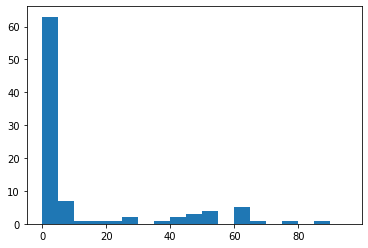

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(sports_df.price,bins=bin_edges)
plt.show()

In [24]:
max(sports_df.price)

495.0

In [25]:
sports_df.loc[sports_df.price == 0,['event_id','local_start_dt','local_end_dt','created_dt','published_dt']]

event_id       local_start_dt         local_end_dt  \
0   66702120839  2019-09-20T12:00:00  2019-09-21T21:00:00   
1   61927175850  2019-10-17T19:00:00  2020-04-25T22:00:00   
2   64868845463  2019-09-22T12:00:00  2019-09-22T19:00:00   
4   63424273710  2019-10-17T19:00:00  2019-10-17T23:00:00   
5   65715012371  2019-11-10T10:00:00  2019-11-17T19:00:00   
..          ...                  ...                  ...   
93  51444645319  2019-10-26T07:30:00  2019-10-26T16:30:00   
94  55778855057  2019-10-12T09:00:00  2019-10-12T17:00:00   
95  67038091737  2019-09-29T10:00:00  2019-09-29T16:00:00   
97  70462097029  2019-09-19T16:00:00  2019-09-19T19:00:00   
99  66905816097  2019-11-02T09:00:00  2019-11-02T13:00:00   

              created_dt          published_dt  
0   2019-07-26T18:30:23Z  2019-07-30T17:12:21Z  
1   2019-05-15T12:21:32Z  2019-05-15T12:38:18Z  
2   2019-07-06T12:27:12Z  2019-07-06T13:00:36Z  
4   2019-06-13T10:47:57Z  2019-06-13T11:01:14Z  
5   2019-07-17T18:05:53Z  2019-07-25T15:04:16Z  
..                   ...                   ...  
93  2018-10-16T01:42:41Z  2018-10-16T01:42:45Z  
94  2019-02-01T18:27:09Z  2019-02-01T23:24:47Z  
95  2019-07-30T15:56:57Z  2019-07-30T16:01:30Z  
97  2019-08-26T04:45:31Z  2019-08-26T04:54:47Z  
99  2019-07-29T16:13:48Z  2019-07-29T16:16:16Z  

[63 rows x 5 columns]

In [26]:
sports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
event_name        100 non-null object
event_id          100 non-null object
organizer         100 non-null object
organization      100 non-null object
local_start_dt    100 non-null object
local_end_dt      100 non-null object
created_dt        100 non-null object
published_dt      100 non-null object
price             100 non-null object
dtypes: object(9)
memory usage: 7.2+ KB


In [27]:
request_json

{'pagination': {'object_count': 8250,
  'page_number': 2,
  'page_size': 50,
  'page_count': 165,
  'has_more_items': True},
 'events': [{'name': {'text': 'Colour Run', 'html': 'Colour Run'},
   'description': {'text': 'Monday 23 September 2019, 4-6pm - FREE to all students and staff of the university. FREE t-shirt for all entrants',
    'html': 'Monday 23 September 2019, 4-6pm - FREE to all students and staff of the university. FREE t-shirt for all entrants'},
   'id': '66684415883',
   'url': 'https://www.eventbrite.co.uk/e/colour-run-tickets-66684415883?aff=ebapi',
   'start': {'timezone': 'Europe/London',
    'local': '2019-09-23T16:00:00',
    'utc': '2019-09-23T15:00:00Z'},
   'end': {'timezone': 'Europe/London',
    'local': '2019-09-23T18:00:00',
    'utc': '2019-09-23T17:00:00Z'},
   'organization_id': '90402217607',
   'created': '2019-07-26T15:09:46Z',
   'changed': '2019-08-31T17:37:03Z',
   'published': '2019-07-26T15:37:28Z',
   'capacity': None,
   'capacity_is_custom': 

In [28]:
sports_df['local_start_dt'] = pd.to_datetime(sports_df['local_start_dt'],infer_datetime_format=True)
sports_df['local_end_dt'] = pd.to_datetime(sports_df['local_end_dt'],infer_datetime_format=True)
sports_df['created_dt'] = pd.to_datetime(sports_df['created_dt'],infer_datetime_format=True)
sports_df['published_dt'] = pd.to_datetime(sports_df['published_dt'],infer_datetime_format=True)

In [29]:
sports_df.sort_values(by=['created_dt'])

event_name     event_id  \
6     Southwest Warriors-Registration-Tickets-Apparel  10628761913   
37  Sign Up to Stay Informed About Bell Joy Ride —...  22240494919   
75                                 50+ Disc Golf Club  26984535472   
68                                 GFNY URUGUAY CLUB   37368444022   
29                 Event Waiver @ Somers Sports Arena  37415609094   
..                                                ...          ...   
86      Fitbit Local Power Yoga & Bodyweight Bootcamp  71434513553   
59             BGSU Hockey Season Ticket Holder Party  71545168525   
69        Bend on Bridge Park Ave with Barre3 & Rebol  71692292577   
9                     WAMI - Yoga Sotto Le Stelle 3.0  72051374601   
65  REEBOK Presents: Midnight Runners 7k Bootcamp,...  72245156207   

      organizer  organization      local_start_dt        local_end_dt  \
6    1880150567   17032646729 2018-05-11 17:00:00 2020-09-23 23:00:00   
37   9857557238  167352192090 2017-01-31 19:00:00 2019-12-29 22:00:00   
75  10674141594  173307282955 2035-12-30 13:00:00 2035-12-31 13:00:00   
68   8767323653  159761206564 2018-12-29 08:00:00 2026-03-27 08:00:00   
29  14901636350  223638375523 2017-08-29 10:00:00 2019-12-31 14:00:00   
..          ...           ...                 ...                 ...   
86   8468688740  126951379279 2019-09-26 18:30:00 2019-09-26 19:30:00   
59  25338978873  315975409699 2019-09-28 11:00:00 2019-09-28 13:30:00   
69   7897242422  104273390857 2019-09-28 08:30:00 2019-09-28 09:30:00   
9   14968175889  221555852194 2019-09-28 19:00:00 2019-09-28 21:00:00   
65  10968470575  158637727881 2019-09-25 19:00:00 2019-09-25 20:30:00   

            created_dt        published_dt  price  
6  2014-02-14 15:57:19 2014-02-14 16:06:35  49.99  
37 2016-02-25 22:20:28 2016-02-25 22:20:30      0  
75 2016-08-06 17:59:11 2016-08-06 18:01:51      0  
68 2017-08-27 16:29:41 2017-08-27 16:40:58      0  
29 2017-08-29 12:15:47 2017-08-29 12:30:29      0  
..                 ...                 ...    ...  
86 2019-09-03 21:50:04 2019-09-03 21:55:48      0  
59 2019-09-04 18:05:01 2019-09-04 18:10:39      0  
69 2019-09-05 18:15:54 2019-09-05 18:25:58      0  
9  2019-09-09 08:42:57 2019-09-09 08:50:06      0  
65 2019-09-10 13:42:32 2019-09-10 14:21:25      0  

[100 rows x 9 columns]

check